# **1. Veri Setini Y√ºkleme ve Genel Yapƒ±sƒ±nƒ± ƒ∞nceleme**

### 1.1. K√ºt√ºphaneleri Y√ºkleme

In [ ]:
!pip install catboost

In [ ]:
# ==========================
# Temel Veri ƒ∞≈üleme ve Sayƒ±sal ƒ∞≈ülemler
# ==========================
import pandas as pd
import numpy as np

# ==========================
# G√∂rselle≈ütirme K√ºt√ºphaneleri
# ==========================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==========================
# ƒ∞statistiksel Analiz
# ==========================
from scipy.stats import skew
from scipy import stats

# ==========================
# Veri √ñn ƒ∞≈üleme
# ==========================
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

# ==========================
# Modelleme ve Deƒüerlendirme Ara√ßlarƒ±
# ==========================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# ==========================
# Makine √ñƒürenmesi Modelleri
# ==========================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ==========================
# Boosting Algoritmalarƒ±
# ==========================
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb



In [ ]:
import warnings # warningleri kapatma
warnings.filterwarnings("ignore")

### 1.2. Veri Setini Y√ºkleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path ='/content/drive/MyDrive/veri/Pokemon.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-9')

### 1.3. Veri Setinin Genel Yapƒ±sƒ±nƒ± ƒ∞nceleme ve G√∂rselle≈ütirme

In [ ]:
df.head() #veri setinin ilk 5 satƒ±rƒ±

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

| **S√ºtun Adƒ±**        | **A√ßƒ±klama**                                                                 |
|----------------------|------------------------------------------------------------------------------|
| `#`                  | Pokemonun veri k√ºmesindeki sƒ±ralama numarasƒ± veya kimliƒüi.                 |
| `Name`               | Pokemonun ismi. G√∂rselle≈ütirme ve tanƒ±mlamada kullanƒ±labilir.                  |
| `Type 1`             | Pokemonun birincil tipi (√∂rneƒüin: Fire, Water). Kategorik deƒüi≈ükendir.     |
| `Type 2`             | Pokemonun varsa ikincil tipi. Bazƒ± Pokemonlar sadece `Type 1`'e sahiptir.  |
| `Total`              | T√ºm istatistiklerin (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) toplamƒ±. |
| `HP`                 | ‚ÄúHealth Points‚Äù yani can puanƒ±. Ne kadar hasar alabileceƒüini g√∂sterir.      |
| `Attack`             | Fiziksel saldƒ±rƒ± g√ºc√º. Fiziksel saldƒ±rƒ±larda etkili olur.                   |
| `Defense`            | Fiziksel savunma g√ºc√º. Fiziksel saldƒ±rƒ±lara kar≈üƒ± dayanƒ±klƒ±lƒ±ƒüƒ± g√∂sterir.   |
| `Sp. Atk`            | √ñzel saldƒ±rƒ± g√ºc√º. B√ºy√º/√∂zel g√º√ßlere dayalƒ± saldƒ±rƒ±larƒ±n g√ºc√ºn√º belirler.   |
| `Sp. Def`            | √ñzel savunma g√ºc√º. √ñzel saldƒ±rƒ±lardan alƒ±nan hasarƒ± azaltƒ±r.                |
| `Speed`              | Hƒ±z. D√∂v√º≈üte √∂nce saldƒ±ran Pokemonu belirler.                              |
| `Generation`         | Pokemonun ait olduƒüu nesil (1‚Äì6). Zamanla gelen yeni ku≈üaklarƒ± g√∂sterir.   |
| `Legendary`          | Pokemonun efsanevi olup olmadƒ±ƒüƒ±nƒ± belirtir (`True` veya `False`).         |

---


In [ ]:
df.tail() #veri setinin son 5 satƒ±rƒ±

#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True

In [ ]:
df.shape #veri setinin satƒ±r-s√ºtun sayƒ±sƒ±

(800, 13)

In [ ]:
df.info() #Veri setinin genel bilgilerini, s√ºtun tiplerini ve eksik deƒüer durumunu anlama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe() # Sayƒ±sal s√ºtunlarƒ±n temel istatistiksel √∂zetini (ortalama, std, min, max vb.) inceleme

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [ ]:
df.describe(include='object').T #object (yani kategorik veya metin t√ºr√º) s√ºtunlar i√ßin istatistiksel √∂zet inceleme

count unique                  top freq
Name     800    800  PumpkabooSuper Size    1
Type 1   800     18                Water  112
Type 2   414     18               Flying   97

In [ ]:
df.nunique() # dfnin i√ßindeki benzersiz deƒüerlerin sayƒ±sƒ±nƒ± inceleme

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [ ]:
df['Generation'].unique() # mesela Generation i√ßin olan 6 benzersiz deƒüerimiz

array([1, 2, 3, 4, 5, 6])

In [ ]:
df['Attack'].unique() # mesela Attack i√ßin olan 111 benzersiz deƒüerimiz

array([ 49,  62,  82, 100,  52,  64,  84, 130, 104,  48,  63,  83, 103,
        30,  20,  45,  35,  25,  90, 150,  60,  80,  56,  81,  85,  55,
        75,  47,  92,  57,  72, 102,  70,  41,  76,  50,  65,  95, 105,
       110,  40, 120,  73,   5, 125,  67, 155,  10, 115, 135, 134, 190,
        46,  38,  58,  33, 185, 164, 160,  51,  71,  91, 140,  43,  78,
        15, 165,  68,  23, 145, 180,  89, 109,  66,  86,  42,  29,  59,
        79,  69,  94, 136,  93,  24, 170, 112,  61, 106, 132, 123,  88,
        53,  98,  77,  27, 117, 108,  44,  87, 147,  74, 124,  97, 129,
       128, 107,  36,  22,  54, 121, 131])

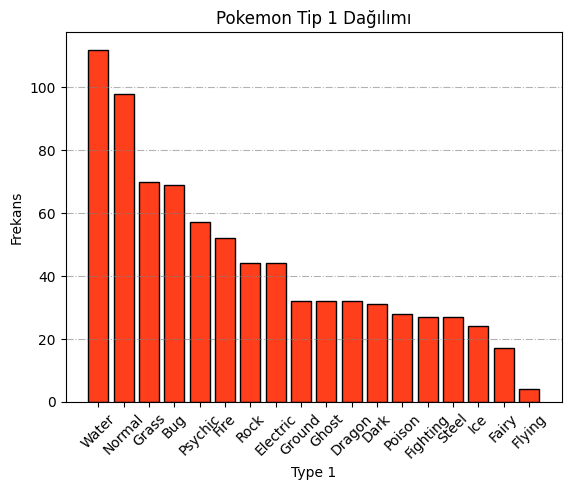

In [ ]:
# 'Type 1' s√ºtunundaki her tipin sayƒ±sƒ±nƒ± hesaplama
type_counts = df['Type 1'].value_counts()

plt.bar(type_counts.index, type_counts.values, color='#FF3E1C', edgecolor='black')

plt.title("Pokemon Tip 1 Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Type 1")
plt.ylabel("Frekans")
plt.xticks(rotation=45)  # Tip isimlerini daha rahat okuyabilmek i√ßin eƒü
plt.grid(axis='y', linestyle='-.', color='gray', alpha=0.6)
plt.show()

**Pokemon Tip 1 Daƒüƒ±lƒ±mƒ±**

Pokemon veri setindeki Type 1 (birincil tip) s√ºtununa ait verilerin daƒüƒ±lƒ±mƒ±nƒ± g√∂rmek i√ßin bar grafiƒüi √ßizdim. Grafikte, her pokemon tipi ve o tipe ait pokemon sayƒ±sƒ± (frekans) g√∂sterildi.
Grafikte dikkat √ßeken noktalar ≈üunlardƒ±r:

- Water tipi a√ßƒ±k ara en y√ºksek frekansa sahip olup 100'√º a≈ükƒ±n pokemon sayƒ±sƒ± ile zirvede yer alƒ±yor. Flying tipi ise en d√º≈ü√ºk frekansa sahip olup yakla≈üƒ±k 4-5 pokemon ile en az temsil edilen tip durumunda. Normal, Grass ve Bug tipleri de y√ºksek frekanslara sahip olup sƒ±rasƒ±yla 60- 100 arasƒ±nda pokemon sayƒ±sƒ±na sahipler.

Bu sonu√ß, veri setinde bazƒ± pokemon tiplerinin (√∂zellikle Water ve Normal) olduk√ßa yaygƒ±n olduƒüunu, bazƒ± tiplerin ise (Flying, Ice, Fairy gibi) nadir bulunduƒüunu g√∂stermektedir.

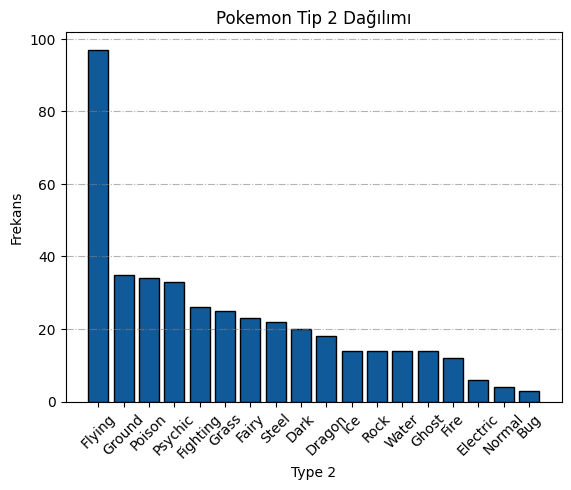

In [ ]:
# 'Type 2' s√ºtunundaki her tipin sayƒ±sƒ±nƒ± hesaplama
type_counts = df['Type 2'].value_counts()

plt.bar(type_counts.index, type_counts.values, color='#115a9a', edgecolor='black')

plt.title("Pokemon Tip 2 Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Type 2")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-.', color='gray', alpha=0.6)
plt.show()

**Pokemon Type 2 Daƒüƒ±lƒ±mƒ±**

Pokemon veri setindeki Type 2 (ikincil tip) s√ºtununa ait verilerin daƒüƒ±lƒ±mƒ±nƒ± g√∂rmek i√ßin bar grafiƒüi √ßizdim. Grafikte, her pokemon tipi ve o tipe ait pokemon sayƒ±sƒ± (frekans) g√∂sterildi.
Grafikte dikkat √ßeken noktalar ≈üunlardƒ±r:

- Flying tipi a√ßƒ±k ara en y√ºksek frekansa sahip olup 100'e yakƒ±n pokemon sayƒ±sƒ± ile zirvede yer alƒ±yor. Bug tipi ise en d√º≈ü√ºk frekansa sahip olup yakla≈üƒ±k 3-4 pokemon ile en az temsil edilen tip durumunda.
Ground, Poison ve Psychic tipleri de y√ºksek frekanslara sahip olup 40'a yakƒ±n pokemon sayƒ±sƒ±na sahipler.

Bu sonu√ß, veri setinde ikincil tip olarak Flying tipinin olduk√ßa yaygƒ±n kullanƒ±ldƒ±ƒüƒ±nƒ±, diƒüer tiplerin ise daha dengeli bir daƒüƒ±lƒ±m g√∂sterdiƒüini ortaya koymaktadƒ±r. Ayrƒ±ca bir√ßok pokemon tipinin ikincil tip olarak nadiren kullanƒ±ldƒ±ƒüƒ± da g√∂r√ºlmektedir.

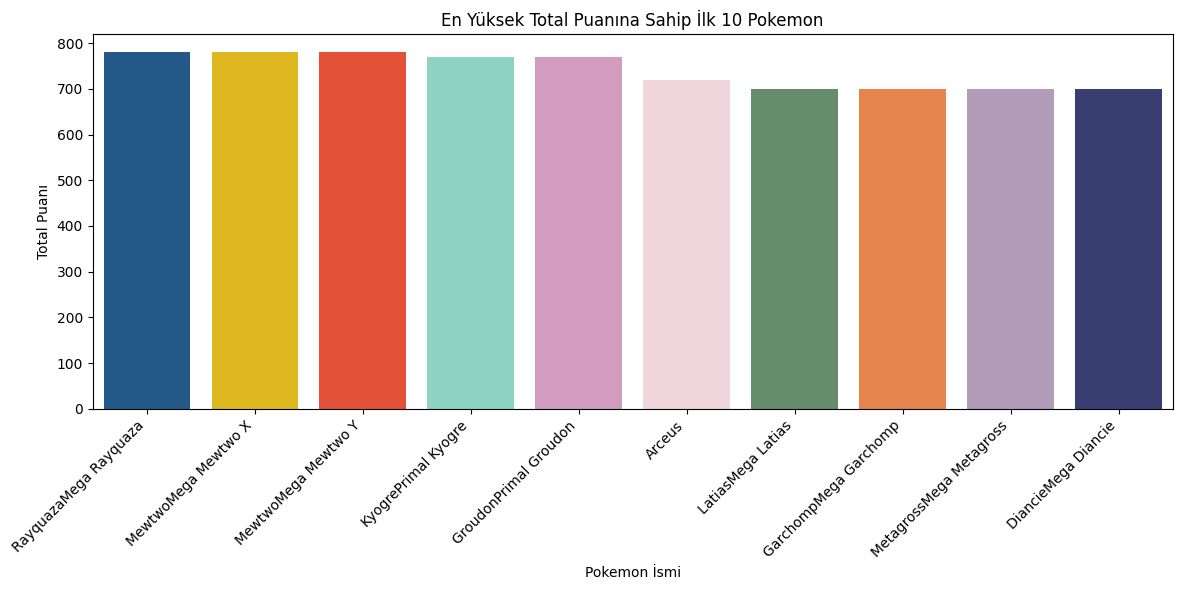

In [ ]:
# En y√ºksek 'Total' puanƒ±na sahip ilk 10 Pokemonun isimlerine g√∂re renkli bar grafiƒüi √ßizimi
top10 = df.sort_values('Total', ascending=False).head(10)

pokemon_colors = ['#115a9a', '#ffcb00', '#FF3E1C', '#80dfc7', '#da93c0', '#f6d1db', '#5f9266', '#fe7f34',  '#b397bf', '#2f367a']

plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Total', data=top10, palette=pokemon_colors)
plt.title('En Y√ºksek Total Puanƒ±na Sahip ƒ∞lk 10 Pokemon')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Puanƒ±')
plt.xlabel('Pokemon ƒ∞smi')
plt.tight_layout()
plt.show()


**En Y√ºksek Total Puanƒ±na Sahip ƒ∞lk 10 Pokemon**

Pokemon veri setindeki toplam g√º√ß puanlarƒ±na g√∂re en g√º√ßl√º 10 pokemonu g√∂rmek i√ßin bar grafiƒüi √ßizdim. Grafikte, her pokemonun ismi ve toplam g√º√ß puanƒ± (Total Puanƒ±) g√∂sterildi.
Grafikte dikkat √ßeken noktalar ≈üunlardƒ±r:

- RayquazaMega Rayquaza en y√ºksek toplam puana sahip olup 780 civarƒ± bir puanla zirvede yer alƒ±yor. DianciaMega Diancia en d√º≈ü√ºk puana sahip olup yakla≈üƒ±k 700 puanla bu liste i√ßerisinde son sƒ±rada yer alƒ±yor.
MewtwoMega Mewtwo X ve MewtwoMega Mewtwo Y de y√ºksek puanlara sahip olup her ikisi de 780 civarƒ±nda g√º√ß puanƒ±na sahipler.

Bu sonu√ß, veri setinde en g√º√ßl√º pokemonlarƒ±n hem Mega evrim ge√ßirmi≈ü formlar hem de efsanevi pokemonlardan olu≈ütuƒüunu g√∂stermektedir. Listede KyogrePrimal, GroudonPrimal ve Arceus gibi efsanevi pokemonlarƒ±n yanƒ± sƒ±ra √ße≈üitli Mega evrim formlarƒ± da yer almaktadƒ±r.



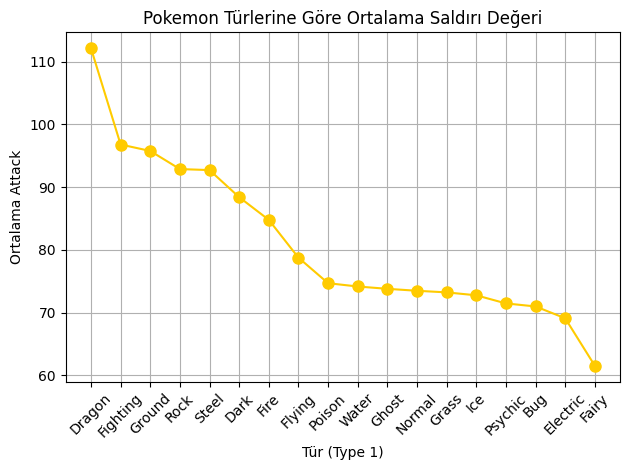

In [ ]:
# Pokemon t√ºrlerine g√∂re ortalama 'Attack' deƒüerlerinin √ßizgi grafiƒüi ile g√∂rselle≈ütirilmesi
type_attack = df.groupby('Type 1')['Attack'].mean().sort_values(ascending=False).head(20)

plt.plot(type_attack.index, type_attack.values, marker='o', linestyle='-', color='#ffcb00', markersize=8)
plt.title('Pokemon T√ºrlerine G√∂re Ortalama Saldƒ±rƒ± Deƒüeri')
plt.xlabel('T√ºr (Type 1)')
plt.ylabel('Ortalama Attack')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Type 1 Attack Daƒüƒ±lƒ±mƒ±**

Pokemon veri setindeki Type 1 (birincil tip) verilerine g√∂re her pokemon tipinin ortalama saldƒ±rƒ± g√ºc√ºn√º g√∂rmek i√ßin √ßizgi grafiƒüi √ßizdim. Grafikte, her pokemon tipi ve o tipe ait ortalama saldƒ±rƒ± deƒüeri g√∂sterildi.
Grafikte dikkat √ßeken noktalar ≈üunlardƒ±r:

- Dragon tipi en y√ºksek ortalama saldƒ±rƒ± deƒüerine sahip olup 110'u a≈ükƒ±n puanla zirvede yer alƒ±yor.
Buna kar≈üƒ±n, Fairy tipi en d√º≈ü√ºk ortalama saldƒ±rƒ± deƒüerine sahip olup yakla≈üƒ±k 60 puanla son sƒ±rada yer alƒ±yor.
Fighting, Ground, Rock ve Steel tipleri de y√ºksek saldƒ±rƒ± deƒüerlerine sahip olup 90-100 puan aralƒ±ƒüƒ±nda yer alƒ±yorlar.

Bu sonu√ß, veri setinde Dragon tipli pokemonlarƒ±n en saldƒ±rgan karaktere sahip olduƒüunu, Fairy tipli pokemonlarƒ±n ise en d√º≈ü√ºk saldƒ±rƒ± g√ºc√ºne sahip olduƒüunu g√∂stermektedir. Ayrƒ±ca grafikteki genel eƒüilimin azalan y√∂nde olmasƒ±, pokemon tiplerinin saldƒ±rƒ± g√º√ßleri a√ßƒ±sƒ±ndan belirgin farklar g√∂sterdiƒüini ortaya koymaktadƒ±r.

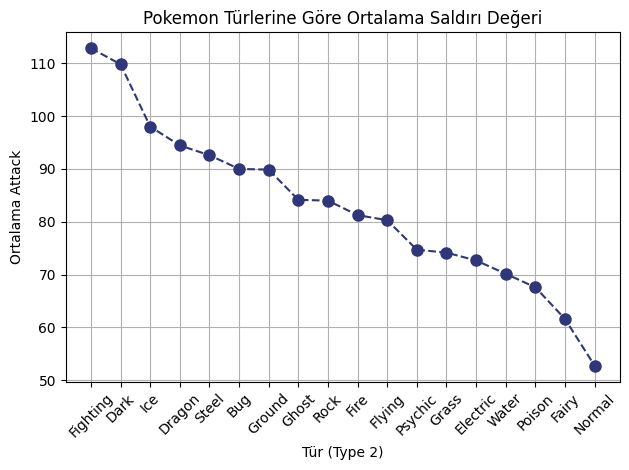

In [ ]:
# Pokemon t√ºrlerine g√∂re ortalama 'Attack' deƒüerlerinin √ßizgi grafiƒüi ile g√∂rselle≈ütirilmesi
type_attack = df.groupby('Type 2')['Attack'].mean().sort_values(ascending=False).head(20)

plt.plot(type_attack.index, type_attack.values, marker='o', linestyle='--', color='#2f367a', markersize=8)
plt.title('Pokemon T√ºrlerine G√∂re Ortalama Saldƒ±rƒ± Deƒüeri')
plt.xlabel('T√ºr (Type 2)')
plt.ylabel('Ortalama Attack')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Type 2 Attack Daƒüƒ±lƒ±mƒ±**

Pokemon veri setindeki Type 2 (ikincil tip) verilerine g√∂re her pokemon tipinin ortalama saldƒ±rƒ± g√ºc√ºn√º g√∂rmek i√ßin √ßizgi grafiƒüi √ßizdim. Grafikte, her pokemon tipi ve o tipe ait ortalama saldƒ±rƒ± deƒüeri g√∂sterildi.
Grafikte dikkat √ßeken noktalar ≈üunlardƒ±r:

- Fighting tipi en y√ºksek ortalama saldƒ±rƒ± deƒüerine sahip olup 110'u a≈ükƒ±n puanla zirvede yer alƒ±yor. Normal tipi ise en d√º≈ü√ºk ortalama saldƒ±rƒ± deƒüerine sahip olup yakla≈üƒ±k 50 puanla son sƒ±rada yer alƒ±yor.
Dark tipi de en y√ºksek 2. saldƒ±rƒ± deƒüerine sahip olup 110 puan civarƒ±nda yer alƒ±yor.

Bu sonu√ß, veri setinde ikincil tip olarak Fighting tipine sahip pokemonlarƒ±n en y√ºksek saldƒ±rƒ± g√ºc√ºne sahip olduƒüunu, Normal tipli pokemonlarƒ±n ise en d√º≈ü√ºk saldƒ±rƒ± g√ºc√ºne sahip olduƒüunu g√∂stermektedir. Ayrƒ±ca grafikteki keskin d√º≈ü√º≈ü eƒüilimi, pokemon tiplerinin saldƒ±rƒ± g√º√ßleri arasƒ±nda olduk√ßa b√ºy√ºk farklar olduƒüunu ortaya koymaktadƒ±r.

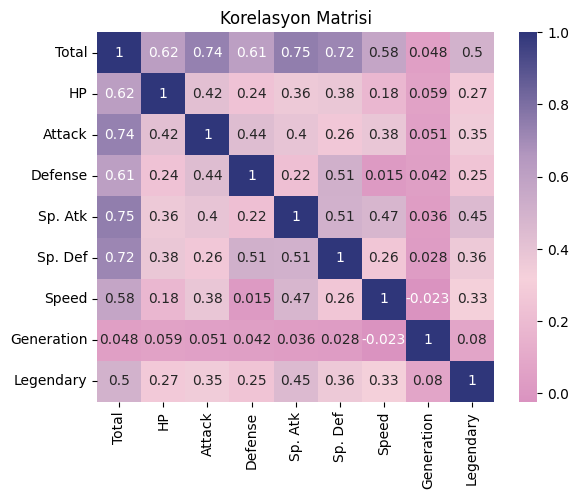

In [ ]:
# Analiz i√ßin '#' s√ºtununu d√º≈ü√ºr√ºyoruz √ß√ºnk√º anlamsƒ±z s√ºtunumuz..
corr = df.drop(columns=['#']).corr(numeric_only=True)

# Daha √∂nce se√ßtiƒüim Pokemon renklerinden olu≈üan √∂zel renk paleti tanƒ±mlanƒ±yorum.
pokecolor = [ '#da93c0', '#f6d1db', '#b397bf', '#2f367a']

# Bu renk paletinden 256 tonlu bir colormap olu≈üturuyorum..
pokemon_cmap = mcolors.LinearSegmentedColormap.from_list("pokemon_cmap", pokecolor, N=256)

# Korelasyon ƒ±sƒ± haritasƒ± √ßizimi
sns.heatmap(corr, annot=True, cmap=pokemon_cmap)
plt.title("Korelasyon Matrisi")
plt.show()


**Korelasyon Matrisi**

Pokemon veri setindeki farklƒ± deƒüi≈ükenler arasƒ±ndaki ili≈ükileri g√∂rmek i√ßin korelasyon matrisi √ßizdim. Matriste, her deƒüi≈üken √ßifti arasƒ±ndaki korelasyon katsayƒ±sƒ± ve renk yoƒüunluƒüu ile ili≈ükinin g√ºc√º g√∂sterildi.

√ñnemli g√∂zlemler:


Total ile Sp. At arasƒ±nda en y√ºksek pozitif korelasyon bulunuyor (0.75), bu da toplam g√º√ß ile √∂zel saldƒ±rƒ± g√ºc√º arasƒ±nda g√º√ßl√º bir ili≈üki olduƒüunu g√∂steriyor.
Ancak generation ile Speed arasƒ±nda en d√º≈ü√ºk korelasyon var (-0.023), bu deƒüi≈ükenler arasƒ±nda neredeyse hi√ß ili≈üki yok.
Total ile Attack (0.74) ve Total ile Sp. Def (0.72) arasƒ±nda da g√º√ßl√º pozitif korelasyonlar mevcut.

Bu sonu√ß, veri setinde pokemonlarƒ±n toplam g√ºc√ºn√ºn √∂zellikle saldƒ±rƒ± yetenekleri (Attack ve Sp. Atk) ile g√º√ßl√º bir ≈üekilde ili≈ükili olduƒüunu g√∂stermektedir. Ayrƒ±ca Generation deƒüi≈ükeninin diƒüer pokemon √∂zelliklerini √∂nemli √∂l√ß√ºde etkilemediƒüi de g√∂r√ºlmektedir.

Attack s√ºtununun skewness deƒüeri: 0.5516


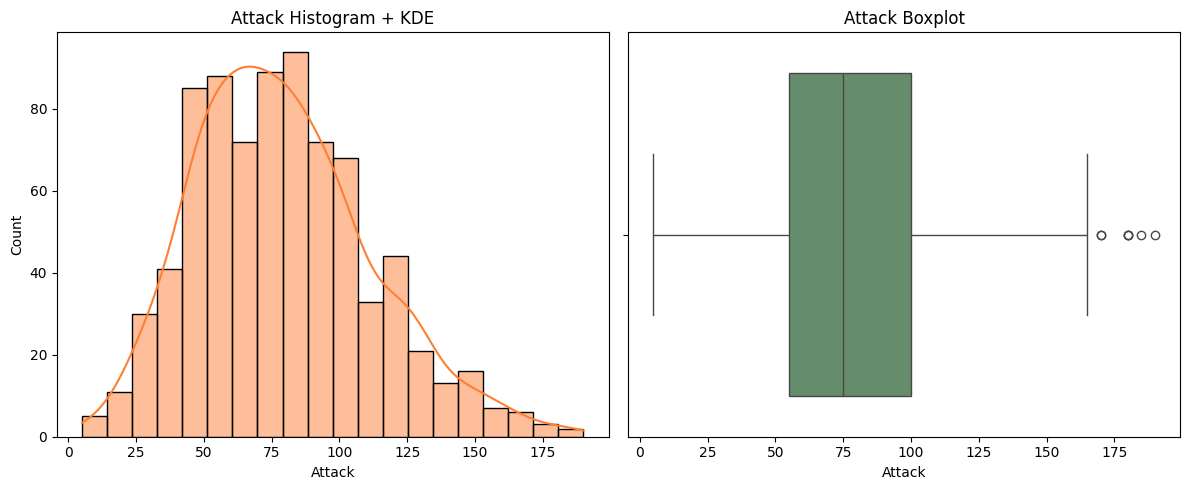

In [ ]:
# Skewness hesapla
skewness = df['Attack'].skew()
print(f"Attack s√ºtununun skewness deƒüeri: {skewness:.4f}")

# Grafik alanƒ± olu≈ütur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Attack'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Attack Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Attack'], ax=axes[1], color='#5f9266')
axes[1].set_title('Attack Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Attack (Saldƒ±rƒ±) Daƒüƒ±lƒ±m Analizi**


---



Sol tarafta histogram ve KDE grafiƒüi ile Saldƒ±rƒ± (Attack) deƒüerlerinin daƒüƒ±lƒ±mƒ±, saƒü tarafta ise boxplot ile √∂zet istatistikler g√∂sterilmi≈ütir.

**Histogram ve KDE Analizi**

- Attack deƒüerlerinin daƒüƒ±lƒ±mƒ±, 75-80 aralƒ±ƒüƒ±nda en y√ºksek frekansa sahiptir ve bu aralƒ±kta 80'in √ºzerinde Pokemon bulunmaktadƒ±r.  
- 125'in √ºzerindeki saldƒ±rƒ± deƒüerlerine sahip Pokemon sayƒ±sƒ± olduk√ßa azdƒ±r ve daƒüƒ±lƒ±m bu noktadan sonra hƒ±zla azalmaktadƒ±r.  
- KDE eƒürisi, yakla≈üƒ±k 75 (75'e yakƒ±n) civarƒ±nda tepe noktasƒ±na ula≈ümakta ve ardƒ±ndan saƒüa doƒüru uzun bir kuyruk olu≈üturarak yava≈ü√ßa azalmaktadƒ±r. Saƒüa √ßarpƒ±klƒ±k belirgin ≈üekilde g√∂r√ºlmektedir.

**Skewness (√áarpƒ±klƒ±k) Analizi**

- Skewness deƒüeri 0.5516 olup, daƒüƒ±lƒ±mƒ±n orta derecede saƒüa √ßarpƒ±k olduƒüunu g√∂stermektedir.  
- Bu deƒüer, grafikten g√∂zlemlenen saƒüa √ßarpƒ±klƒ±ƒüƒ± doƒürulamaktadƒ±r ve savunma deƒüerine g√∂re daha az √ßarpƒ±k bir daƒüƒ±lƒ±m sergiler.

**Boxplot Detaylƒ± Analizi**

- Minimum deƒüer: 0-25 arasƒ±nda, 0'a √ßok daha yakƒ±n.
- Birinci √áeyrek (Q1 - %25'lik dilim): Yakla≈üƒ±k 50 civarƒ±nda, kutunun alt sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.  
- Medyan (Q2 - %50'lik dilim): Yakla≈üƒ±k 75 civarƒ±nda, kutu i√ßindeki kalƒ±n √ßizgi ile g√∂steriliyor.  
- √ú√ß√ºnc√º √áeyrek (Q3 - %75'lik dilim): Yakla≈üƒ±k 100 civarƒ±nda, kutunun √ºst sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.  
- Maksimum deƒüer: Yakla≈üƒ±k 165 civarƒ±nda.  
- Aykƒ±rƒ± Deƒüerler (Outliers): 175'in √ºzerindeki saldƒ±rƒ± deƒüerlerinde 4 adet belirgin aykƒ±rƒ± veri bulunmaktadƒ±r.

**Sonu√ß**

Kutunun alt ve √ºst sƒ±nƒ±rlarƒ± (Q1 ve Q3) medyan √ßizgisinden nispeten dengeli uzaklƒ±ktadƒ±r, ancak √ºst kƒ±sƒ±m biraz daha geni≈ü g√∂r√ºnmektedir. Bu durum, verinin hafif saƒüa √ßarpƒ±k daƒüƒ±lƒ±mƒ±nƒ± boxplot a√ßƒ±sƒ±ndan da desteklemektedir. Attack daƒüƒ±lƒ±mƒ±, Defense daƒüƒ±lƒ±mƒ±na kƒ±yasla daha simetrik bir yapƒ± sergiler ve Pokemonlarƒ±n saldƒ±rƒ± deƒüerleri savunma deƒüerlerine g√∂re daha normal daƒüƒ±lƒ±ma yakƒ±n bir pattern g√∂stermektedir.


Defense s√ºtununun skewness deƒüeri: 1.1559


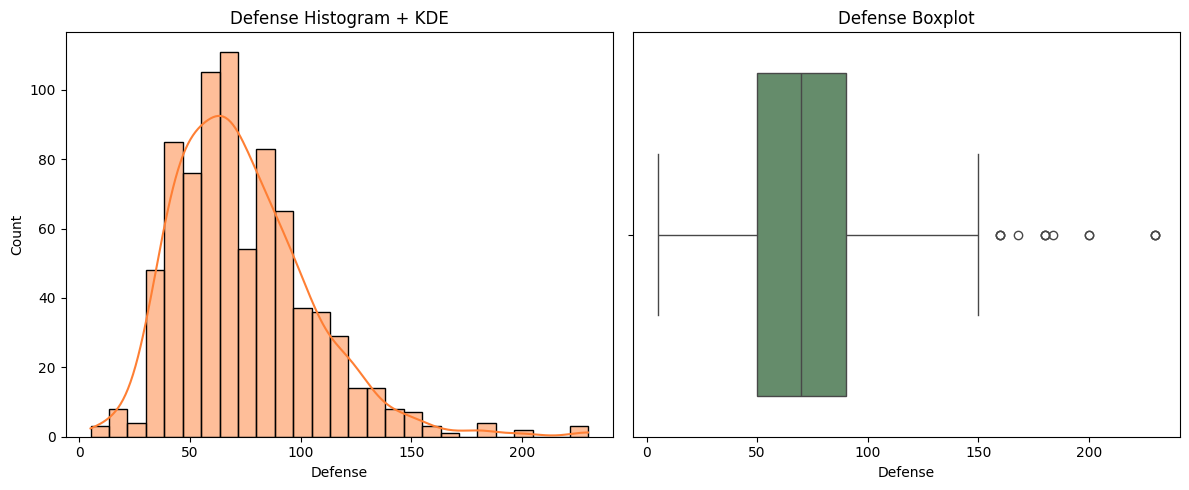

In [ ]:
# Skewness hesapla
skewness = df['Defense'].skew()
print(f"Defense s√ºtununun skewness deƒüeri: {skewness:.4f}")

# Grafik alanƒ± olu≈ütur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Defense'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Defense Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Defense'], ax=axes[1], color='#5f9266')
axes[1].set_title('Defense Boxplot')

plt.tight_layout()
plt.show()


**Pokemon Veri Setinde Defense (Savunma) Daƒüƒ±lƒ±m Analizi**


---



Sol tarafta histogram ve KDE grafiƒüi ile Savunma (Defense) deƒüerlerinin daƒüƒ±lƒ±mƒ±, saƒü tarafta ise boxplot ile √∂zet istatistikler g√∂sterilmi≈ütir.

**Histogram ve KDE Analizi**

- Defense deƒüerlerinin daƒüƒ±lƒ±mƒ±, 60-70 aralƒ±ƒüƒ±nda en y√ºksek frekansa sahiptir ve bu aralƒ±kta 100'√ºn √ºzerinde Pokemon bulunmaktadƒ±r.  
- 150'nin √ºzerindeki savunma deƒüerlerine sahip Pokemon sayƒ±sƒ± olduk√ßa azdƒ±r; 200'√ºn √ºzerinde ise neredeyse hi√ß Pokemon yoktur.  
- KDE eƒürisi, yakla≈üƒ±k 65 civarƒ±nda tepe noktasƒ±na ula≈ümakta ve ardƒ±ndan saƒüa doƒüru uzun bir kuyruk olu≈üturarak yava≈ü√ßa azalmaktadƒ±r. Buradan daƒüƒ±lƒ±mƒ±n g√º√ßl√º bir ≈üekilde saƒüa √ßarpƒ±k olduƒüu sonucu √ßƒ±karƒ±labilir.

**Skewness (√áarpƒ±klƒ±k) Analizi**

- Skewness deƒüeri 1.1559 olup, daƒüƒ±lƒ±mƒ±n g√º√ßl√º derecede saƒüa √ßarpƒ±k olduƒüunu g√∂stermektedir.  
- Bu deƒüer, grafikten √ßƒ±karƒ±lan saƒüa √ßarpƒ±klƒ±k yorumunu belirgin ≈üekilde doƒürulamaktadƒ±r.

**Boxplot Detaylƒ± Analizi**

- Minimum deƒüer: 0 ile 50 arasƒ±nda, 0'a daha yakƒ±n.
- Birinci √áeyrek (Q1 - %25'lik dilim): Yakla≈üƒ±k 50 civarƒ±nda, kutunun alt sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.  
- Medyan (Q2 - %50'lik dilim): Yakla≈üƒ±k 70 civarƒ±nda, kutu i√ßindeki kalƒ±n √ßizgi ile g√∂steriliyor.  
- √ú√ß√ºnc√º √áeyrek (Q3 - %75'lik dilim): Yakla≈üƒ±k 100 civarƒ±nda, kutunun √ºst sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.  
- Maksimum deƒüer: 150 civarƒ±nda.  
- Aykƒ±rƒ± Deƒüerler (Outliers): 150'nin √ºzerindeki savunma deƒüerlerinde 6 adet belirgin aykƒ±rƒ± deƒüer bulunmaktadƒ±r.

Sonu√ß olarak kutunun alt ve √ºst sƒ±nƒ±rlarƒ± (Q1 ve Q3) medyan √ßizgisinden yakla≈üƒ±k olarak e≈üit uzaklƒ±ktadƒ±r; bu da verinin orta kƒ±smƒ±nda simetrik bir daƒüƒ±lƒ±m olduƒüunu g√∂sterir.


Sp. Atk s√ºtununun skewness deƒüeri: 0.7447


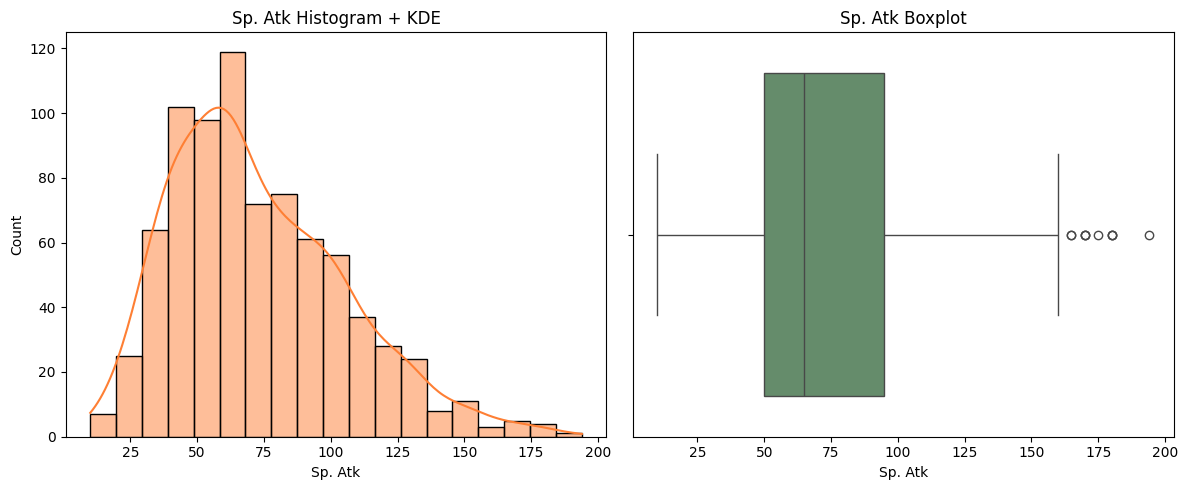

In [ ]:
# Skewness hesapla
skewness = df['Sp. Atk'].skew()
print(f"Sp. Atk s√ºtununun skewness deƒüeri: {skewness:.4f}")

# Grafik alanƒ± olu≈ütur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Sp. Atk'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Sp. Atk Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Sp. Atk'], ax=axes[1], color='#5f9266')
axes[1].set_title('Sp. Atk Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Sp. Atk (√ñzel Saldƒ±rƒ±) Daƒüƒ±lƒ±m Analizi**


---

Sol tarafta histogram ve KDE grafiƒüi ile Sp. Atk (√ñzel Saldƒ±rƒ±) deƒüerlerinin daƒüƒ±lƒ±mƒ±, saƒü tarafta ise boxplot ile √∂zet istatistikler g√∂sterilmi≈ütir.


**Histogram ve KDE Analizi**

- Sp. Atk deƒüerlerinin daƒüƒ±lƒ±mƒ±, yakla≈üƒ±k 60-70 aralƒ±ƒüƒ±nda en y√ºksek frekansa sahip olup bu aralƒ±kta yakla≈üƒ±k 120 Pokemon bulunmaktadƒ±r. Bu, √∂zel savunmaya g√∂re biraz daha yoƒüun bir yƒ±ƒüƒ±lma g√∂stermektedir.  
- 100'√ºn √ºzerindeki √∂zel saldƒ±rƒ± deƒüerlerine sahip Pokemon sayƒ±sƒ± giderek azalmakta, 150'nin √ºzerinde ise olduk√ßa nadir hale gelmektedir.  

- KDE eƒürisi, yakla≈üƒ±k 55-60 aralƒ±ƒüƒ±nda tepe noktasƒ±na ula≈ütƒ±ktan sonra saƒüa doƒüru uzun bir kuyruk olu≈üturarak yava≈ü√ßa azalmaktadƒ±r. Bu durum, daƒüƒ±lƒ±mƒ±n saƒüa √ßarpƒ±k karakterini net bir ≈üekilde ortaya koymaktadƒ±r.

**Skewness (√áarpƒ±klƒ±k) Analizi**

Skewness deƒüeri 0.7447 olup, daƒüƒ±lƒ±mƒ±n orta derecede saƒüa √ßarpƒ±k olduƒüunu g√∂stermektedir.

**Boxplot Detaylƒ± Analizi**
- Minimum deƒüer: 0 ile 25 arasƒ±nda, sƒ±fƒ±ra olduk√ßa yakƒ±n.  
- Bieinci √áeyrek (Q1 - %25'lik dilim): Yakla≈üƒ±k 50 civarƒ±nda, kutunun alt sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.  
- Medyan (Q2 - %50'lik dilim): Yakla≈üƒ±k 65 civarƒ±nda, kutu i√ßindeki kalƒ±n √ßizgi ile g√∂steriliyor.  
- √ú√ß√ºnc√º √áeyrek (Q3 - %75'lik dilim): Yakla≈üƒ±k 100 civarƒ±nda, kutunun √ºst sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.   
- Maksimum deƒüer: Yakla≈üƒ±k 165 civarƒ±nda.  
- Aykƒ±rƒ± Deƒüerler (Outliers): Yakla≈üƒ±k 165'in √ºzerinde 5 adet belirgin aykƒ±rƒ± veri bulunmaktadƒ±r.  

Sonu√ß olarak Boxplot'ta kutunun √ºst kƒ±smƒ±nƒ±n alt kƒ±smƒ±ndan daha geni≈ü olmasƒ±, y√ºksek deƒüerler tarafƒ±nda daha fazla varyasyon olduƒüunu i≈üaret etmekte ve bu da saƒüa √ßarpƒ±klƒ±ƒüƒ± desteklemektedir.

Sp. Def s√ºtununun skewness deƒüeri: 0.8540


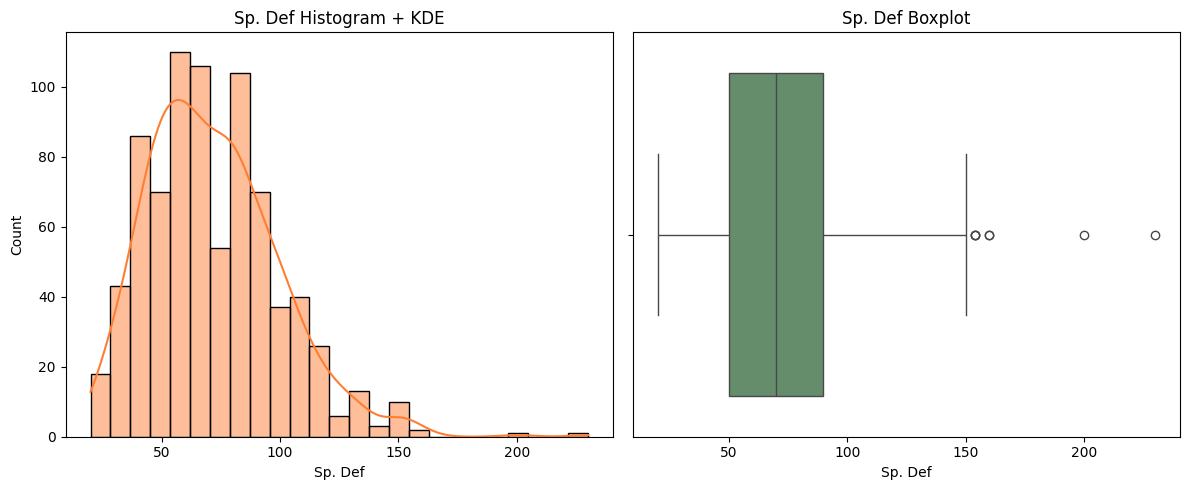

In [ ]:
# Skewness hesapla
skewness = df['Sp. Def'].skew()
print(f"Sp. Def s√ºtununun skewness deƒüeri: {skewness:.4f}")

# Grafik alanƒ± olu≈ütur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Sp. Def'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Sp. Def Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Sp. Def'], ax=axes[1], color='#5f9266')
axes[1].set_title('Sp. Def Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Sp. Def (√ñzel Savunma) Daƒüƒ±lƒ±m Analizi**


---



Sol tarafta histogram ve KDE grafiƒüi ile √ñzel Savunma (Sp. Def) deƒüerlerinin daƒüƒ±lƒ±mƒ±, saƒü tarafta ise boxplot ile √∂zet istatistikler g√∂sterilmi≈ütir.

**Histogram ve KDE Analizi**

- Sp. Def deƒüerlerinin daƒüƒ±lƒ±mƒ±, 50-60 aralƒ±ƒüƒ±nda en y√ºksek frekansa sahiptir ve bu aralƒ±kta yakla≈üƒ±k 100'√ºn √ºzerinde Pokemon bulunmaktadƒ±r.
- 150'nin √ºzerindeki √∂zel savunma deƒüerlerine sahip Pokemon sayƒ±sƒ± olduk√ßa azdƒ±r; 200'√ºn √ºzerinde ise neredeyse hi√ß Pokemon yoktur.
- KDE eƒürisi, yakla≈üƒ±k 50-60 aralƒ±ƒüƒ±nda tepe noktasƒ±na ula≈ümakta ve ardƒ±ndan saƒüa doƒüru uzun bir kuyruk olu≈üturarak yava≈ü√ßa azalmaktadƒ±r. Buradan da saƒüa √ßarpƒ±klƒ±k yorumu yapabiliriz..

**Skewness (√áarpƒ±klƒ±k) Analizi**
- Skewness deƒüeri 0.8540 olup, daƒüƒ±lƒ±mƒ±n orta derecede saƒüa √ßarpƒ±k olduƒüunu g√∂stermektedir. Bu deƒüerde grafikten √ßƒ±karƒ±lan saƒüa √ßarpƒ±klƒ±k belirgin ≈üekilde g√∂r√ºlmektedir.

**Boxplot Detaylƒ± Analizi**
- Minimum deƒüer: 0 ile 50 arasƒ±nda, sƒ±fƒ±ra olduk√ßa yakƒ±n.
- Birinci √áeyrek (Q1 - %25'lik dilim): Yakla≈üƒ±k 50 civarƒ±nda, kutunun alt sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.
- Medyan (Q2 - %50'lik dilim): Yakla≈üƒ±k 70 civarƒ±nda, kutu i√ßindeki kalƒ±n √ßizgi ile g√∂steriliyor.
- √ú√ß√ºnc√º √áeyrek (Q3 - %75'lik dilim): Yakla≈üƒ±k 90 civarƒ±nda, kutunun √ºst sƒ±nƒ±rƒ±nƒ± olu≈üturuyor.
- Maksimum deƒüer: Yakla≈üƒ±k 150 civarƒ±nda.
- Aykƒ±rƒ± Deƒüerler (Outliers): 150'nin √ºzerindeki hƒ±z deƒüerlerinde 4 adet belirgin aykƒ±rƒ± veri bulunmaktadƒ±r.

Sonu√ß olarak kutunun alt ve √ºst sƒ±nƒ±rlarƒ± (Q1 ve Q3) medyan √ßizgisinden yakla≈üƒ±k olarak e≈üit uzaklƒ±ktadƒ±r; bu da verinin orta kƒ±smƒ±nda simetrik bir daƒüƒ±lƒ±m olduƒüunu g√∂sterir.

Speed s√ºtununun skewness deƒüeri: 0.3579


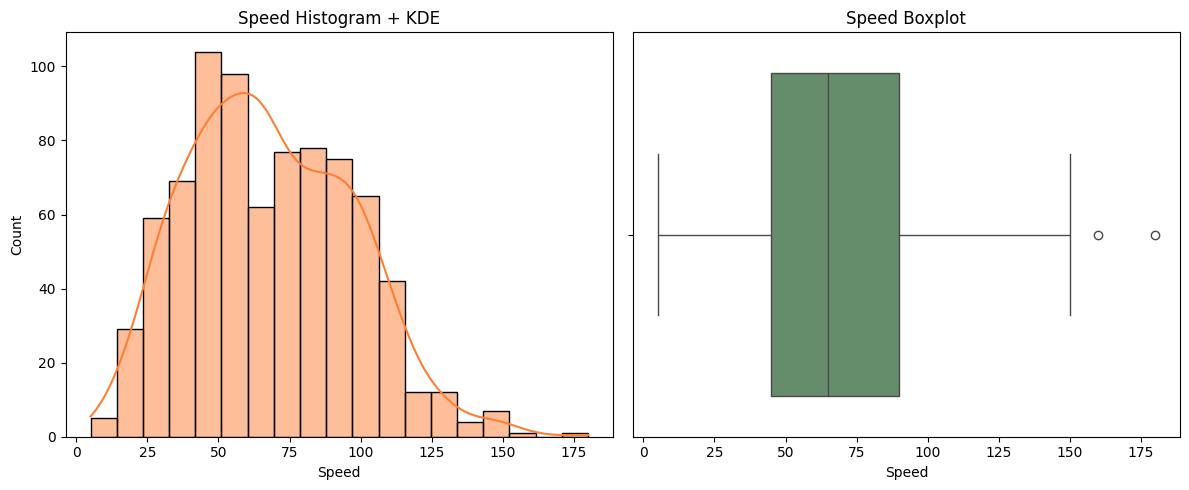

In [ ]:
# Skewness hesapla
skewness = df['Speed'].skew()
print(f"Speed s√ºtununun skewness deƒüeri: {skewness:.4f}")

# Grafik alanƒ± olu≈ütur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Speed'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Speed Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Speed'], ax=axes[1], color='#5f9266')
axes[1].set_title('Speed Boxplot')

plt.tight_layout()
plt.show()

**Speed (Hƒ±z) Daƒüƒ±lƒ±mƒ± Analizi**


---
Sol tarafta histogram ve KDE grafiƒüi ile Speed (Hƒ±z) deƒüerlerinin daƒüƒ±lƒ±mƒ±, saƒü tarafta ise boxplot ile √∂zet istatistikler g√∂sterilmi≈ütir.


**Histogram ve KDE Grafiƒüi**

- Speed deƒüerlerinin daƒüƒ±lƒ±mƒ±, yakla≈üƒ±k olarak 50 civarƒ±nda en y√ºksek frekansa sahiptir. Bu aralƒ±klarda her biri 100'e yakƒ±n ya da 100'√ºn √ºzerinde Pokemon sayƒ±sƒ± bulunmaktadƒ±r.

- 150'nin √ºzerindeki hƒ±z deƒüerlerine sahip Pokemon sayƒ±sƒ± olduk√ßa d√º≈ü√ºkt√ºr ve neredeyse sƒ±fƒ±ra yakƒ±ndƒ±r.

- KDE eƒürisi, yakla≈üƒ±k 60 civarƒ±nda tepe noktasƒ±na ula≈ümakta ve sonrasƒ±nda saƒüa doƒüru yava≈ü yava≈ü azalarak saƒüa √ßarpƒ±k bir daƒüƒ±lƒ±m g√∂stermektedir.

**Skewness (√áarpƒ±klƒ±k) Analizi**

Hesaplanan skewness deƒüeri 0.3579 olup, daƒüƒ±lƒ±mƒ±n hafif saƒüa √ßarpƒ±k olduƒüunu g√∂stermektedir. Bu durum, √ßoƒüu Pokemonun d√º≈ü√ºk-orta hƒ±z deƒüerlerine sahip olduƒüunu, az sayƒ±da Pokemonun ise √ßok y√ºksek hƒ±z deƒüerlerine sahip olduƒüunu ifade eder.

**Boxplot Analizi**
- Minimum deƒüer: 0 ile 25 arasƒ±nda, sƒ±fƒ±ra olduk√ßa yakƒ±n.
- Birinci √áeyrek (Q1 - %25'lik dilim): Yakla≈üƒ±k 45 civarƒ±nda, kutunun alt sƒ±nƒ±rƒ±.  
- Medyan (Q2 - %50'lik dilim): Yakla≈üƒ±k 65 civarƒ±nda, kutu i√ßindeki kalƒ±n √ßizgi ile g√∂steriliyor.  
- √ú√ß√ºnc√º √áeyrek (Q3 - %75'lik dilim): Yakla≈üƒ±k 90 civarƒ±nda, kutunun √ºst sƒ±nƒ±rƒ±.  
- Maksimum deƒüer: Yakla≈üƒ±k 150 civarƒ±nda.
- Aykƒ±rƒ± deƒüerler: 150'nin √ºzerindeki hƒ±z deƒüerlerinde 2 adet belirgin aykƒ±rƒ± veri bulunmaktadƒ±r.
  
Ayrƒ±ca medyan √ßizgisi ile √ºst(3.) √ßeyrek arasƒ±ndaki geni≈ülik, medyan √ßizgisi ile alt(1.) √ßeyreklik arasƒ±ndaki geni≈ülikten fazladƒ±r. Bu durum, hƒ±z deƒüerlerinin medyanƒ±n √ºst√ºnde daha fazla √ße≈üitlilik ve yayƒ±lƒ±m g√∂sterdiƒüini ifade eder.  Yani, orta hƒ±zƒ±n √ºzerindeki hƒ±zlar daha geni≈ü bir skalada daƒüƒ±lmƒ±≈ütƒ±r.


# **2.  Veri √ñn i≈üleme**

## **2.1. Eksik Deƒüer Analizi**

### 2.1.1. Eksik Veri Olan S√ºtunlar

In [ ]:
df.isnull().sum() #eksik olan s√ºtunlarƒ± inceleme

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Sadece Type 2	s√ºtunumuda 386 eksik deƒüerimiz olduƒüunu g√∂r√ºyoruz..

### 2.1.2. Her Bir S√ºtun ƒ∞√ßin Eksik Oran

In [ ]:
# Her s√ºtun i√ßin eksik veri oranƒ± (satƒ±r sayƒ±sƒ±na g√∂re)
missing_ratio = df.isnull().sum() / len(df)

# Yalnƒ±zca eksik verisi olan s√ºtunlar
missing_ratio = missing_ratio[missing_ratio > 0]

print(missing_ratio.sort_values(ascending=False))


Type 2    0.4825
dtype: float64


Ve bu eksik deƒüerin oranƒ±na baktƒ±ƒüƒ±mƒ±zda %48.25 olduƒüunu g√∂r√ºyoruz..


### 2.1.3. Eksik Verileri Doldurma

**Nasƒ±l bir yol izleyeceƒüiz?**
- Pokemonlarƒ±n birinci t√ºr√º (Type 1) her zaman dolu ama ikinci t√ºr√º (Type 2) neredeyse yarƒ±sƒ±nda eksik. Bu aslƒ±nda mantƒ±klƒ±, √ß√ºnk√º pek √ßok Pokemon sadece bir tipe sahip. (Burada yakla≈üƒ±k olarak yarƒ±sƒ± olduƒüunu g√∂r√ºyoruz..) Eksik Type 2 deƒüerlerinin olmasƒ± doƒüal ve beklenen bir durumdur. Ben Type 2 s√ºtununu analizlerimde kullanacaƒüƒ±m i√ßin, eksik deƒüerleri None veya No Type gibi bir kategoride gruplayacaƒüƒ±m..

In [ ]:
df['Type 2'] = df['Type 2'].fillna('No Type') #eksik deƒüerleri 'No Type' olarak doldurma


In [ ]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

G√∂r√ºld√ºƒü√º √ºzere Type 2 s√ºtunundaki eksik deƒüerlerim yok oldu..

In [ ]:
df['Type 2'].value_counts()['No Type'] # 'Type 2' s√ºtununda deƒüeri 'No Type' olan kayƒ±tlarƒ±n sayƒ±sƒ±nƒ± verir.


np.int64(386)

Buradan da g√∂r√ºyoruz ki, doldurma i≈ülememiz ba≈üarƒ±yla tamamlanmƒ±≈ü. 386 bo≈ü deƒüerim vardƒ±, ≈üimdi 386 No Type deƒüerim var..

 ## **2.2.  Gereksiz S√ºtunlarƒ±n Kaldƒ±rƒ±lmasƒ±**

### 2.2.1. Modelleme A√ßƒ±sƒ±ndan Bilgi Ta≈üƒ±mayan Deƒüi≈ükenlerin √áƒ±karƒ±lmasƒ±

In [ ]:
df.drop(columns=['#', 'Name'], inplace=True)

In [ ]:
df.head()

Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  Grass   Poison    318  45      49       49       65       65     45   
1  Grass   Poison    405  60      62       63       80       80     60   
2  Grass   Poison    525  80      82       83      100      100     80   
3  Grass   Poison    625  80     100      123      122      120     80   
4   Fire  No Type    309  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False

- **`#` s√ºtunu** yalnƒ±zca Pokemonlarƒ±n veri setindeki sƒ±ralamasƒ±nƒ± ifade eden bir ID numarasƒ±dƒ±r. Model a√ßƒ±sƒ±ndan anlamsal bir bilgi ta≈üƒ±madƒ±ƒüƒ±ndan √ßƒ±karƒ±lmƒ±≈ütƒ±r.
- **`Name` s√ºtunu** g√∂rselle≈ütirme ve tanƒ±mlama ama√ßlƒ± kullanƒ±labilir olsa da modelleme i√ßin doƒürudan anlamlƒ± bir deƒüi≈üken deƒüildir. Ek olarak, isimlerin istatistiksel bir katkƒ± saƒülamamasƒ± ve modele g√ºr√ºlt√º ekleme ihtimali nedeniyle √ßƒ±karƒ±lmƒ±≈ütƒ±r.


 ## **2.3. √ñzellik M√ºhendisliƒüi**

### 2.3.1. Var Olan √ñzelliklerden Yeni √ñzellikler T√ºretilmesi

In [ ]:
# √ñzellik m√ºhendisliƒüi

df['Is_Mono_Type'] = (df['Type 2'] == 'No Type').astype(int) # Daha √∂nce Type 2 s√ºtunundaki eksik deƒüerleri "No Type" olarak doldurmu≈ütuk.
# Bu sayede eksik deƒüerleri √ßƒ±karmak yerine, tek tip Pokemonlarƒ± kolayca tespit edebilme ≈üansƒ± elde ettik..
# ≈ûimdi Is_Mono_Type s√ºtunuyla tek tip ve √ßift tip ayrƒ±mƒ±nƒ± rahatlƒ±kla yapabiliyoruz. Ne i≈üe yaradƒ±ƒüƒ±nƒ± g√∂rd√ºk..

df['Attack_Defense_Ratio'] = df['Attack'] / df['Defense'] #Saldƒ±rƒ± / Savunma oranƒ±

# HP'nin toplam deƒüere oranƒ± (dayanƒ±klƒ±lƒ±ƒüƒ±n g√∂receli √∂l√ß√ºs√º)
# Bu √∂zellik, Pokemonun toplam g√ºc√ºne kƒ±yasla ne kadar dayanƒ±klƒ± olduƒüunu g√∂sterir.
# Y√ºksek deƒüerler, g√∂receli olarak daha saƒülam bir yapƒ±ya i≈üaret eder.
df['HP_to_Total'] = df['HP'] / df['Total']

# Speed ile Attack oranƒ± (hƒ±zlƒ± ve g√º√ßl√º kombinasyon)
# Bu oran, bir Pokemonun hem hƒ±zlƒ± hem de g√º√ßl√º olma yeteneƒüini √∂l√ßer.
# D√∂v√º≈ülerde √∂nce saldƒ±rma ve y√ºksek hasar verme avantajƒ±nƒ± temsil eder.
df['Speed_to_Attack'] = df['Speed'] / df['Attack']

# Nesil bazƒ±nda one-hot encoding yapalƒ±m
# Pokemonun hangi nesile ait olduƒüunu modelin anlayabilmesi i√ßin kategorik deƒüi≈ükeni sayƒ±sal hale getiriyoruz.
# B√∂ylece farklƒ± nesillerin √∂zellikleri ve g√º√ß dengeleri modele yansƒ±tƒ±lƒ±r.
generation_dummies = pd.get_dummies(df['Generation'], prefix='Gen')

# Orijinal dataframe'e ekleyelim
# One-hot encoding ile olu≈üturulan nesil s√ºtunlarƒ±nƒ± orijinal veri setine ekliyoruz.
df = pd.concat([df, generation_dummies], axis=1)

In [ ]:
df.head()

Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  Grass   Poison    318  45      49       49       65       65     45   
1  Grass   Poison    405  60      62       63       80       80     60   
2  Grass   Poison    525  80      82       83      100      100     80   
3  Grass   Poison    625  80     100      123      122      120     80   
4   Fire  No Type    309  39      52       43       60       50     65   

   Generation  ...  Is_Mono_Type  Attack_Defense_Ratio  HP_to_Total  \
0           1  ...             0              1.000000     0.141509   
1           1  ...             0              0.984127     0.148148   
2           1  ...             0              0.987952     0.152381   
3           1  ...             0              0.813008     0.128000   
4           1  ...             1              1.209302     0.126214   

   Speed_to_Attack  Gen_1  Gen_2  Gen_3  Gen_4  Gen_5  Gen_6  
0         0.918367   True  False  False  False  False  False  
1         0.967742   True  False  False  False  False  False  
2         0.975610   True  False  False  False  False  False  
3         0.800000   True  False  False  False  False  False  
4         1.250000   True  False  False  False  False  False  

[5 rows x 21 columns]

 ## **2.4.  Aykƒ±rƒ± Deƒüer Analizi**

Yukarƒ±daki g√∂rselle≈ütirme a≈üamamƒ±mƒ±zda aykƒ±rƒ± deƒüerlerimiz olduƒüunu g√∂rm√º≈üt√ºk ≈üimdi onlara birde IQR y√∂ntemi ile bakalƒ±m..

### 2.4.1. IQR Y√∂ntemine G√∂re Aykƒ±rƒ± Deƒüerleri Tespit Etme

In [ ]:
# Sadece sayƒ±sal veri tipine sahip s√ºtunlarƒ± se√ßiyoruz
numeric_cols = df.select_dtypes(include='number').columns

# Her bir sayƒ±sal s√ºtun i√ßin d√∂ng√º ba≈ülatƒ±yoruz
for col in numeric_cols:

    # 1. √ßeyrek deƒüer (Q1): Verinin %25'i bu deƒüerin altƒ±nda
    Q1 = df[col].quantile(0.25)

    # 3. √ßeyrek deƒüer (Q3): Verinin %75'i bu deƒüerin altƒ±nda
    Q3 = df[col].quantile(0.75)

    # IQR (Interquartile Range): Q3 - Q1 ‚Üí orta %50'lik aralƒ±k
    IQR = Q3 - Q1

    # Aykƒ±rƒ± deƒüer alt sƒ±nƒ±rƒ±: Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Aykƒ±rƒ± deƒüer √ºst sƒ±nƒ±rƒ±: Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykƒ±rƒ± deƒüerleri filtreleme: alt sƒ±nƒ±rdan k√º√ß√ºk veya √ºst sƒ±nƒ±rdan b√ºy√ºk olanlar
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Eƒüer aykƒ±rƒ± deƒüer varsa (outliers bo≈ü deƒüilse)
    if not outliers.empty:
        # Hangi s√ºtunda aykƒ±rƒ± deƒüer bulunduƒüunu yazdƒ±r
        print(f"\n - Aykƒ±rƒ± deƒüerler - {col} s√ºtunu:")

        # Sadece o s√ºtundaki aykƒ±rƒ± deƒüerleri yazdƒ±r
        print(outliers[[col]])




 - Aykƒ±rƒ± deƒüerler - HP s√ºtunu:
      HP
45   140
121  250
142  130
145  130
155  160
217  190
261  255
313  150
316    1
321  144
350  130
351  170
473  150
495  135
544  150
545  150
655  165
792  126
793  126

 - Aykƒ±rƒ± deƒüerler - Attack s√ºtunu:
     Attack
163     190
232     185
424     180
426     180
429     180
494     170
711     170

 - Aykƒ±rƒ± deƒüerler - Defense s√ºtunu:
     Defense
87       180
98       180
103      160
223      200
224      230
230      230
332      180
333      230
414      200
424      160
430      160
456      168
789      184

 - Aykƒ±rƒ± deƒüerler - Sp. Atk s√ºtunu:
     Sp. Atk
71       175
102      170
164      194
196      165
306      165
422      180
426      180
429      180
712      170
798      170

 - Aykƒ±rƒ± deƒüerler - Sp. Def s√ºtunu:
     Sp. Def
230      230
269      154
270      154
415      200
422      160
430      160
739      154

 - Aykƒ±rƒ± deƒüerler - Speed s√ºtunu:
     Speed
315    160
431    180

 - Aykƒ±rƒ± deƒüe

Veri setimizde bazƒ± s√ºtunlarda aykƒ±rƒ± deƒüerler olduƒüu g√∂rselle≈ütirme adƒ±mƒ±nda olduƒüu gibi burada da g√∂r√ºlmektedir. Bu deƒüerler, analiz ve modelleme s√ºrecinde dikkate alƒ±nmalƒ±dƒ±r:

- HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Attack_Defense_Ratio, HP_to_Total, Speed_to_Attack

Bu s√ºtunlardaki u√ß deƒüerler, veri daƒüƒ±lƒ±mƒ±nƒ± etkileyebilir. Gerekliliƒüibe g√∂re temizleme veya d√∂n√º≈üt√ºrme i≈ülemleri uygulanmalƒ±dƒ±r..

 ## **2.5.  Aykƒ±rƒ± Deƒüer ƒ∞≈üleme**

üéØ**Hedef Deƒüi≈üken ve √ñnemli √ñzellikler**


---


Bu √ßalƒ±≈ümada Pokemon veri seti kullanƒ±lmƒ±≈ütƒ±r. Veri setindeki temel ama√ß, bir Pokemonun "Legendary" (efsanevi) olup olmadƒ±ƒüƒ±nƒ± tahmin etmektir. Bu nedenle Legendary s√ºtunu hedef deƒüi≈üken olarak belirlenmi≈ütir.

Modellemeye katkƒ± saƒülayabilecek, Pokemonun sava≈ü g√ºc√ºn√º ve genel performansƒ±nƒ± yansƒ±tan bazƒ± sayƒ±sal deƒüi≈ükenler √∂zellikle √∂nem arz etmektedir. Bunlar:

- HP, Attack, Defense, Sp. Atk, Sp. Def, Speed ve bu deƒüi≈ükenlerden t√ºretilmi≈ü oranlar olan Attack_Defense_Ratio, HP_to_Total, Speed_to_Attack

Bu deƒüi≈ükenler, Pokemonun g√º√ß profiline dair doƒürudan bilgi sunduƒüu i√ßin, modelin Legendary sƒ±nƒ±flandƒ±rmasƒ±nƒ± √∂ƒürenmesinde kritik rol oynar. Aykƒ±rƒ± deƒüerler bu nedenle dikkatle analiz edilmi≈ü ve veri setinde tutularak uygun d√∂n√º≈ü√ºmlere tabi tutulmu≈ütur.

### 2.5.1. Aykƒ±rƒ± Deƒüerleri Baskƒ±lama

In [ ]:
print(f"HP s√ºtununun skewness deƒüeri: {df['HP'].skew():.4f}")
print(f"Attack s√ºtununun skewness deƒüeri: {df['Attack'].skew():.4f}")
print(f"Defense s√ºtununun skewness deƒüeri: {df['Defense'].skew():.4f}")
print(f"Sp. Atk s√ºtununun skewness deƒüeri: {df['Sp. Atk'].skew():.4f}")
print(f"Sp. Def s√ºtununun skewness deƒüeri: {df['Sp. Def'].skew():.4f}")
print(f"Speed s√ºtununun skewness deƒüeri: {df['Speed'].skew():.4f}")
print(f"Attack_Defense_Ratio s√ºtununun skewness deƒüeri: {df['Attack_Defense_Ratio'].skew():.4f}")
print(f"HP_to_Total s√ºtununun skewness deƒüeri: {df['HP_to_Total'].skew():.4f}")
print(f"Speed_to_Attack s√ºtununun skewness deƒüeri: {df['Speed_to_Attack'].skew():.4f}")


HP s√ºtununun skewness deƒüeri: 1.5682
Attack s√ºtununun skewness deƒüeri: 0.5516
Defense s√ºtununun skewness deƒüeri: 1.1559
Sp. Atk s√ºtununun skewness deƒüeri: 0.7447
Sp. Def s√ºtununun skewness deƒüeri: 0.8540
Speed s√ºtununun skewness deƒüeri: 0.3579
Attack_Defense_Ratio s√ºtununun skewness deƒüeri: 4.3953
HP_to_Total s√ºtununun skewness deƒüeri: 2.5022
Speed_to_Attack s√ºtununun skewness deƒüeri: 5.4867


**üìä Skewness (√áarpƒ±klƒ±k) Analizi**


---
Bu deƒüerler, √∂zellikle Attack_Defense_Ratio, Speed_to_Attack, HP_to_Total, HP ve Defense gibi s√ºtunlarda saƒüa √ßarpƒ±klƒ±k (pozitif skewness) olduƒüunu g√∂stermektedir. Diƒüer s√ºtunlarda da az veya orta d√ºzeyde saƒüa √ßarpƒ±klƒ±k mevcuttur. Bu durum, verilerin simetrik bir daƒüƒ±lƒ±m g√∂stermediƒüini ve modelleme a≈üamasƒ±nda bu √ßarpƒ±klƒ±ƒüƒ±n dikkate alƒ±nmasƒ± gerektiƒüini ortaya koyar.

**üîÑ D√∂n√º≈ü√ºm Yakla≈üƒ±mlarƒ±**


---


√áarpƒ±k daƒüƒ±lƒ±mlƒ± verilerde ilk akla gelen d√∂n√º≈ü√ºm y√∂ntemlerinden biri logaritmik (log) d√∂n√º≈ü√ºmd√ºr. Log d√∂n√º≈ü√ºm√º √∂zellikle saƒüa √ßarpƒ±k verilerde etkili olabilir; √ß√ºnk√º y√ºksek deƒüerleri sƒ±kƒ±≈ütƒ±rarak verinin daha simetrik hale gelmesini saƒülar. Bu nedenle, saƒüa √ßarpƒ±klƒ±k g√∂steren s√ºtunlarda ilk olarak log d√∂n√º≈ü√ºm√º uygulanacaktƒ±r..


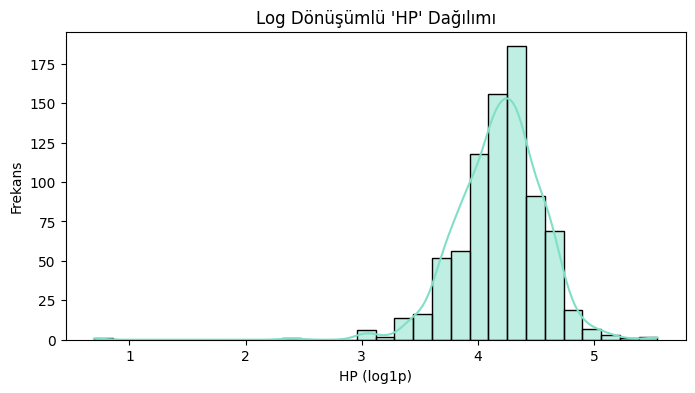

HP s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -1.2292


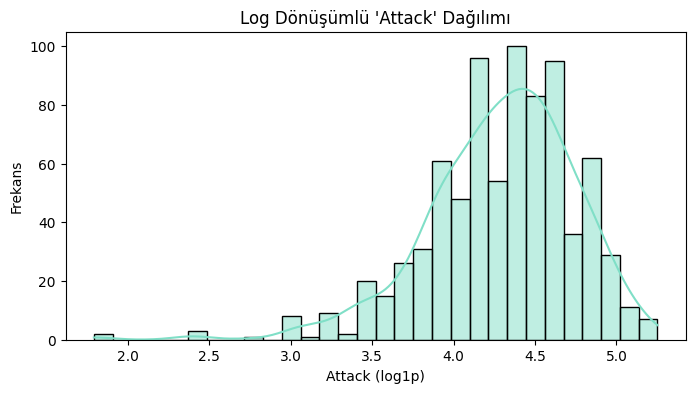

Attack s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.9993


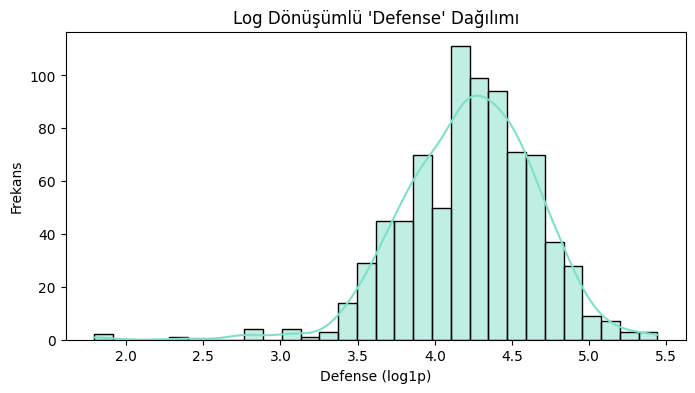

Defense s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.6924


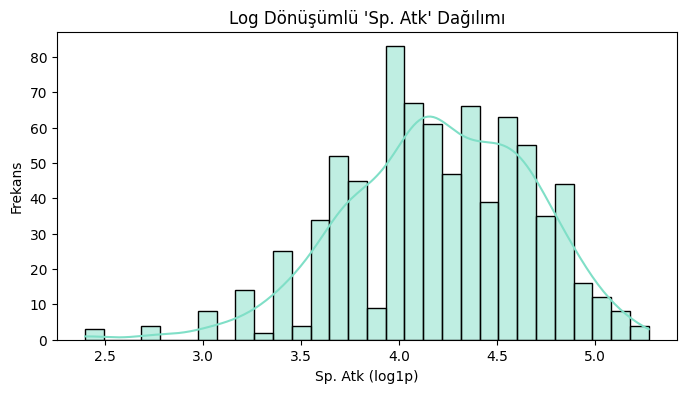

Sp. Atk s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.4429


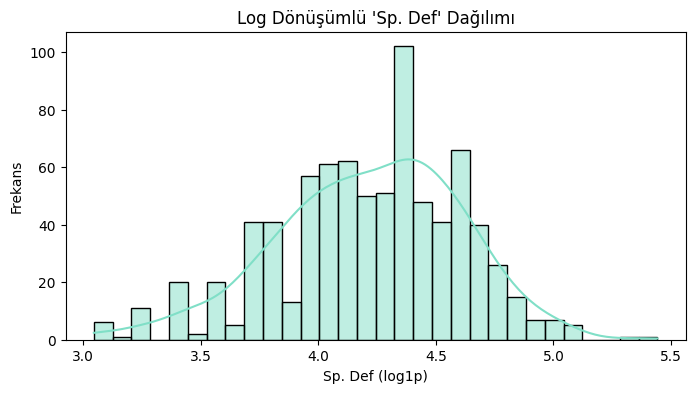

Sp. Def s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.3277


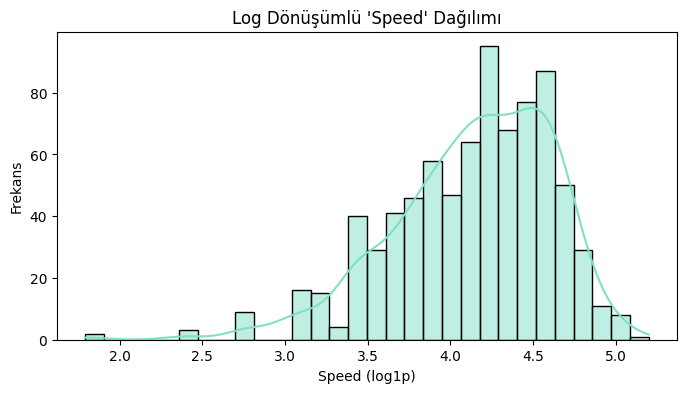

Speed s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.9019


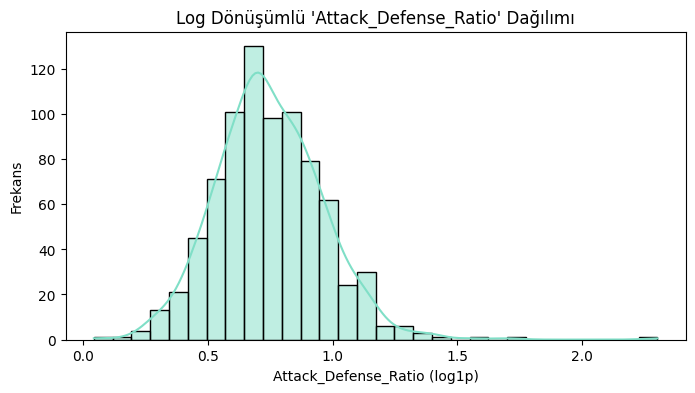

Attack_Defense_Ratio s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.7302


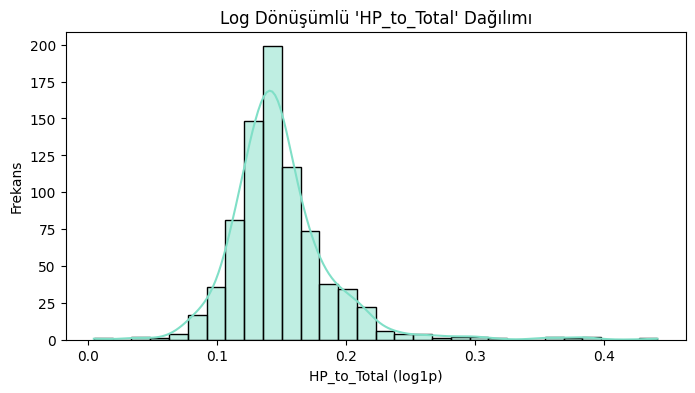

HP_to_Total s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 2.0047


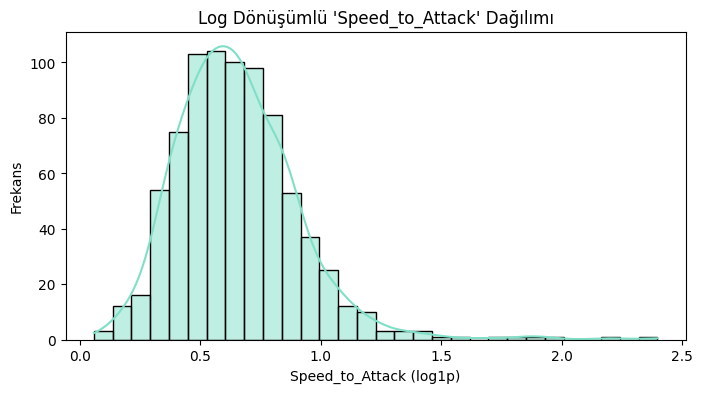

Speed_to_Attack s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 1.4401


In [ ]:
# Aykƒ±rƒ±lƒ±k barƒ±ndƒ±ran s√ºtunlar
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Attack_Defense_Ratio', 'HP_to_Total', 'Speed_to_Attack']

for col in columns:
    # Log1p d√∂n√º≈ü√ºm
    transformed = np.log1p(df[col])

    # Histogram ve KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed, bins=30, kde=True, color="#80dfc7")
    plt.title(f"Log D√∂n√º≈ü√ºml√º '{col}' Daƒüƒ±lƒ±mƒ±")
    plt.xlabel(f"{col} (log1p)")
    plt.ylabel("Frekans")
    plt.show()

    # Yeni √ßarpƒ±klƒ±k
    new_skew = skew(transformed)
    print(f"{col} s√ºtunu - Log d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: {new_skew:.4f}")

**üìâ Log D√∂n√º≈ü√ºm Sonrasƒ± √áarpƒ±klƒ±k Analizi**


---


Veri setinde saƒüa √ßarpƒ±klƒ±k (pozitif skewness) g√∂steren s√ºtunlara log1p d√∂n√º≈ü√ºm√º uygulandƒ±ktan sonra elde edilen √ßarpƒ±klƒ±k deƒüerleri a≈üaƒüƒ±da verilmi≈ütir:

- HP s√ºtunu: -1.2292

- Attack s√ºtunu: -0.9993

- Defense s√ºtunu: -0.6924

- Sp. Atk s√ºtunu: -0.4429

- Sp. Def s√ºtunu: -0.3277

- Speed s√ºtunu: -0.9019

- Attack_Defense_Ratio s√ºtunu 0.7302  ‚Üí √∂zellik m√ºh. ile olu≈üturuldu..  
- HP_to_Total s√ºtunu: 2.0047 ‚Üí √∂zellik m√ºh. ile olu≈üturuldu..
- Speed_to_Attack s√ºtunu: 1.4401  ‚Üí √∂zellik m√ºh. ile olu≈üturuldu..

G√∂r√ºld√ºƒü√º √ºzere, log d√∂n√º≈ü√ºm√º sonrasƒ± var olan t√ºm s√ºtunlarda a≈üƒ±rƒ± sola √ßarpƒ±klƒ±k (negatif skewness) olu≈ümu≈ütur. Bu durum, log d√∂n√º≈ü√ºm√ºn√ºn √ßarpƒ±klƒ±ƒüƒ± azaltmakla birlikte daƒüƒ±lƒ±mƒ± simetrik hale getirmekte yetersiz kaldƒ±ƒüƒ±nƒ± ve hatta fazla ters y√∂nde bozduƒüunu g√∂stermektedir. √ñzellik m√ºh. ile olu≈üturulan s√ºtunlarda ise; Ba≈ülangƒ±√ßta, √∂zelliklerin daƒüƒ±lƒ±mlarƒ±ndaki y√ºksek pozitif √ßarpƒ±klƒ±ƒüƒ± azaltmak i√ßin log d√∂n√º≈ü√ºm√º denendi. Log d√∂n√º≈ü√ºm bazƒ± s√ºtunlarda (√∂rneƒüin `Attack_Defense_Ratio`) √ßarpƒ±klƒ±ƒüƒ± azalttƒ± ancak bazƒ± s√ºtunlarda (`HP_to_Total`) istenilen d√ºzeyde √ßarpƒ±klƒ±k azalmadƒ±.

**üîÑ Alternatif D√∂n√º≈ü√ºm: Box-Cox**


---


Bu nedenle, daha esnek bir d√∂n√º≈ü√ºm y√∂ntemi olan Box-Cox d√∂n√º≈ü√ºm√º denenmi≈ütir. Box-Cox d√∂n√º≈ü√ºm√º, parametreye baƒülƒ± olarak hem saƒüa hem de sola √ßarpƒ±klƒ±ƒüƒ± azaltabilen ve veriyi normalize etmeye daha yatkƒ±n bir y√∂ntemdir. Sadece pozitif deƒüerlerde uygulanabilir olmasƒ± dƒ±≈üƒ±nda, √ßarpƒ±klƒ±ƒüƒ± dengeleme konusunda log d√∂n√º≈ü√ºm√ºne g√∂re daha g√º√ßl√º bir alternatiftir.

Bir sonraki adƒ±mda, Box-Cox d√∂n√º≈ü√ºm√ºn√ºn bu s√ºtunlar √ºzerindeki etkisi incelenecektir.



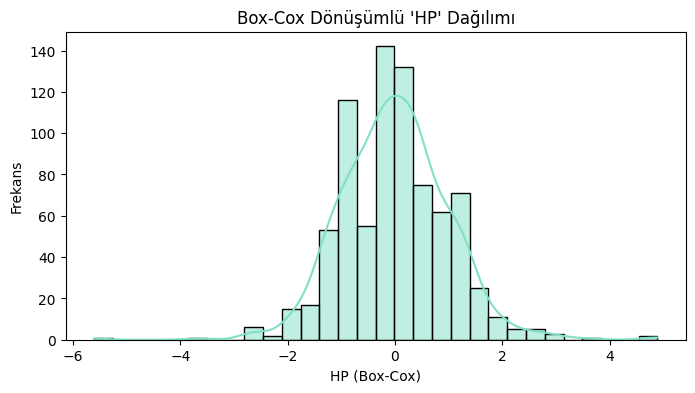

HP s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.1477


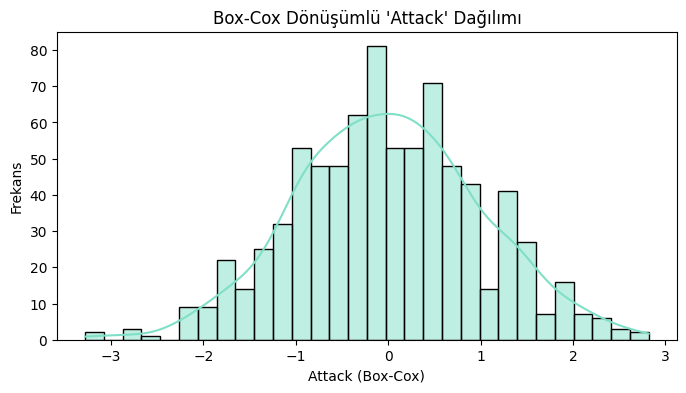

Attack s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.0065


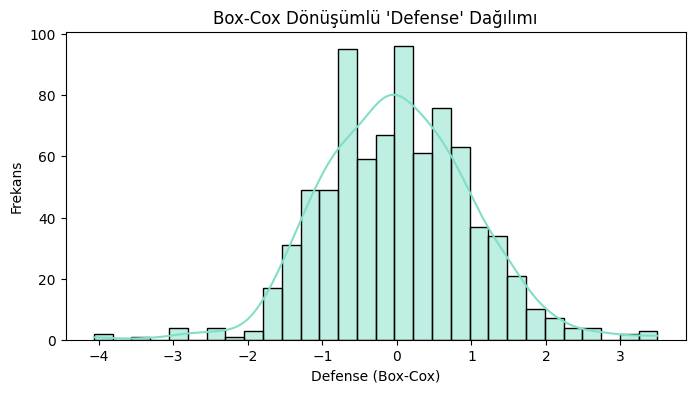

Defense s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.0505


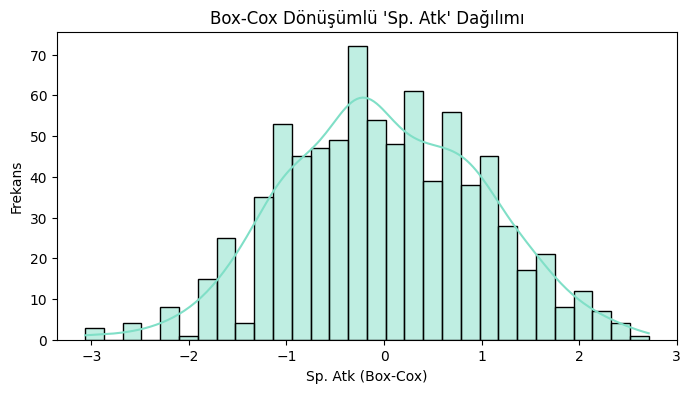

Sp. Atk s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.0110


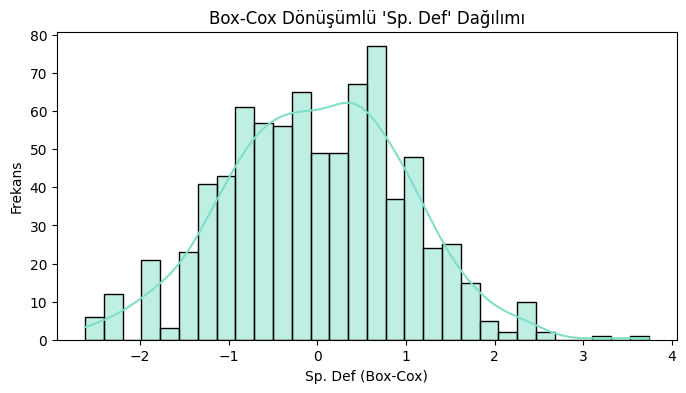

Sp. Def s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.0033


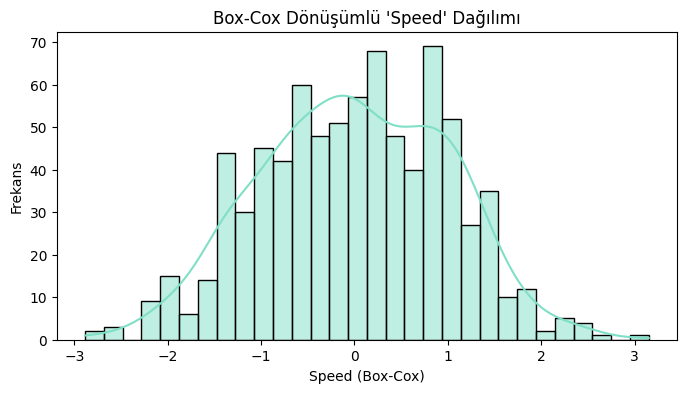

Speed s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: -0.0455


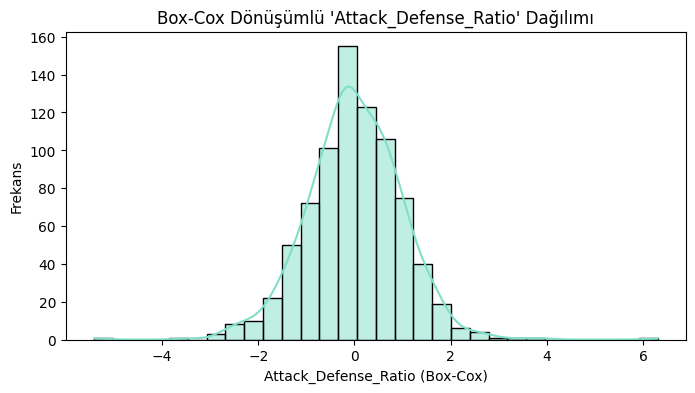

Attack_Defense_Ratio s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.0919


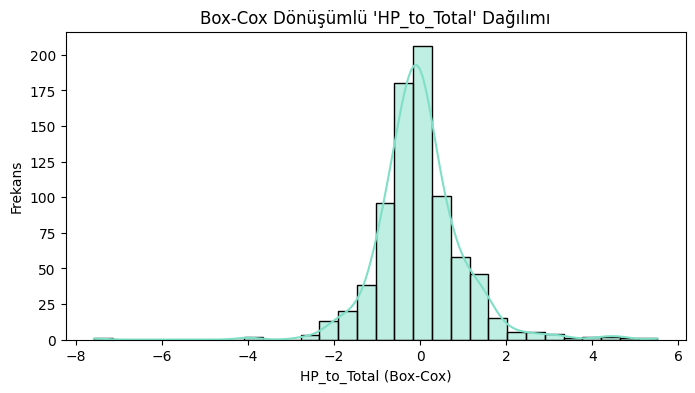

HP_to_Total s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.2886


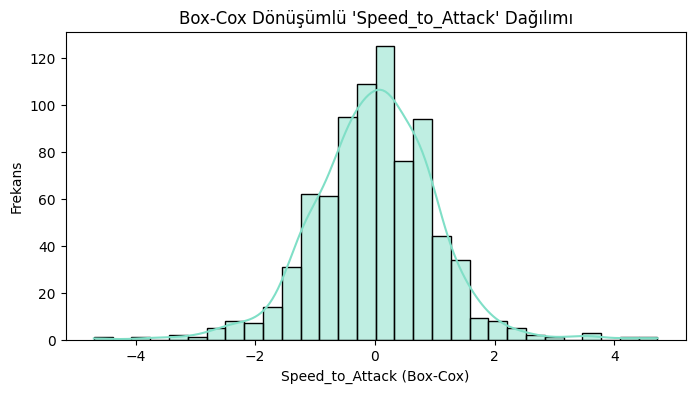

Speed_to_Attack s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: 0.0137


In [ ]:
# Aykƒ±rƒ±lƒ±k barƒ±ndƒ±ran s√ºtunlar
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Attack_Defense_Ratio', 'HP_to_Total', 'Speed_to_Attack']

for col in columns:

    # Box-Cox d√∂n√º≈ü√ºm (sadece pozitif deƒüerler i√ßin uygundur)
    data = df[col].values.reshape(-1, 1)

    # Box-Cox d√∂n√º≈ü√ºm
    pt_boxcox = PowerTransformer(method='box-cox')
    transformed = pt_boxcox.fit_transform(data).flatten()

    # Histogram ve KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed, bins=30, kde=True, color="#80dfc7")
    plt.title(f"Box-Cox D√∂n√º≈ü√ºml√º '{col}' Daƒüƒ±lƒ±mƒ±")
    plt.xlabel(f"{col} (Box-Cox)")
    plt.ylabel("Frekans")
    plt.show()

    # Yeni √ßarpƒ±klƒ±k
    new_skew = skew(transformed)
    print(f"{col} s√ºtunu - Box-Cox d√∂n√º≈ü√ºm sonrasƒ± √ßarpƒ±klƒ±k: {new_skew:.4f}")

**üìå Box-Cox D√∂n√º≈ü√ºm√º ile √áarpƒ±klƒ±k Azaltma**


---



Log d√∂n√º≈ü√ºm√º uygulandƒ±ƒüƒ±nda bir√ßok s√ºtunun daƒüƒ±lƒ±mƒ± sola √ßarpƒ±k hale gelmi≈üti. Bu durum, istatistiksel analiz ve modelleme s√ºre√ßlerinde doƒürusal varsayƒ±mlarƒ±n bozulmasƒ±na neden olabilir.  
Bu nedenle, yalnƒ±zca pozitif deƒüerlerde uygulanabilen ve daƒüƒ±lƒ±mlarƒ± normale yakla≈ütƒ±rma konusunda olduk√ßa ba≈üarƒ±lƒ± olan **Box-Cox d√∂n√º≈ü√ºm√º** tercih edilmi≈ütir.

A≈üaƒüƒ±da, her s√ºtun i√ßin Box-Cox d√∂n√º≈ü√ºm√ºnden **√∂nceki ve sonraki √ßarpƒ±klƒ±k (skewness)** deƒüerleri kar≈üƒ±la≈ütƒ±rmalƒ± olarak verilmi≈ütir:

| S√ºtun               | Orijinal Skewness | Box-Cox Sonrasƒ± Skewness |
|---------------------|-------------------|--------------------------|
| HP                  | 1.5682            | 0.1477                   |
| Attack              | 0.5516            | 0.0065                   |
| Defense             | 1.1559            | 0.0505                   |
| Sp. Atk             | 0.7447            | -0.0110                  |
| Sp. Def             | 0.8540            | -0.0033                  |
| Speed               | 0.3579            | -0.0455                  |
| Attack_Defense_Ratio | 4.3953            | 0.0919                  |
| HP_to_Total         | 2.5022            | 0.2886                   |
| Speed_to_Attack     | 5.4867            | 0.0137                   |


üîç **Yorum:**  
Box-Cox d√∂n√º≈ü√ºm√º, t√ºm s√ºtunlardaki √ßarpƒ±klƒ±k deƒüerlerini b√ºy√ºk √∂l√ß√ºde azaltarak daƒüƒ±lƒ±mlarƒ± daha simetrik hale getirmi≈ütir. Bu sayede, √∂zellikle regresyon gibi parametrik y√∂ntemlerde daha g√ºvenilir ve anlamlƒ± sonu√ßlar elde edilebilir.

√ñzellik m√ºh. ile olu≈üturduƒüumuz s√ºtunlara bakarsak ise Box-Cox d√∂n√º≈ü√ºm√º, log d√∂n√º≈ü√ºm√ºne g√∂re bu 3 s√ºtundaki √ßarpƒ±klƒ±ƒüƒ± √ßok daha iyi azalttƒ±. Log d√∂n√º≈ü√ºm bazƒ± s√ºtunlarda hala y√ºksek √ßarpƒ±klƒ±k bƒ±rakƒ±rken, Box-Cox simetrik ve dengeli daƒüƒ±lƒ±m saƒüladƒ±. Bu sayede √∂zellikler modele daha uygun hale geldi ve performans artƒ±≈üƒ± beklenir.


 ## **2.6.  Kategorik Verileri Kodlama**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type 1                800 non-null    object 
 1   Type 2                800 non-null    object 
 2   Total                 800 non-null    int64  
 3   HP                    800 non-null    int64  
 4   Attack                800 non-null    int64  
 5   Defense               800 non-null    int64  
 6   Sp. Atk               800 non-null    int64  
 7   Sp. Def               800 non-null    int64  
 8   Speed                 800 non-null    int64  
 9   Generation            800 non-null    int64  
 10  Legendary             800 non-null    bool   
 11  Is_Mono_Type          800 non-null    int64  
 12  Attack_Defense_Ratio  800 non-null    float64
 13  HP_to_Total           800 non-null    float64
 14  Speed_to_Attack       800 non-null    float64
 15  Gen_1                 8

**Kategorik Deƒüi≈ükenlerin ƒ∞≈ülenmesi**


---



Veri setimizde bulunan ve kategorik olarak i≈ülenmesi gereken deƒüi≈ükenler ≈üunlardƒ±r:

- **Type 1** (object): Pokemonun birinci t√ºr√º  
- **Type 2** (object): ƒ∞kinci t√ºr (varsa)  
- **Legendary** (bool): Efsanevi olup olmadƒ±ƒüƒ±  

Bu deƒüi≈ükenler modelleme a≈üamasƒ±nda sayƒ±sal forma d√∂n√º≈üt√ºr√ºlmelidir.

- **Type 1** ve **Type 2** gibi birden √ßok kategori i√ßeren s√ºtunlar i√ßin **One-Hot Encoding** kullanƒ±lƒ±r.  
  √á√ºnk√º bu deƒüi≈ükenlerin kategorileri arasƒ±nda herhangi bir sƒ±ralama veya b√ºy√ºkl√ºk ili≈ükisi yoktur.  
  One-Hot Encoding ile her kategori ayrƒ± s√ºtuna d√∂n√º≈üt√ºr√ºl√ºr ve modelin yanlƒ±≈ü sƒ±ralama algƒ±lamasƒ±nƒ±n √∂n√ºne ge√ßilir.

- **Legendary** s√ºtunu ise bool (True/False) olduƒüu i√ßin doƒürudan **Label Encoding** (True ‚Üí 1, False ‚Üí 0) ile sayƒ±sal hale getirilmesi uygundur.  
  Bu durumda deƒüerler zaten ikili olduƒüu i√ßin One-Hot‚Äôa gerek yoktur.




### 2.6.1. `Legendary`: LabelEncoder

In [ ]:
le = LabelEncoder()
df['legendary_label'] = le.fit_transform(df['Legendary']) # 'Legendary' s√ºtunundaki kategorik verileri sayƒ±sal etiketlere d√∂n√º≈üt√ºrerek 'legendary_label' adlƒ± yeni s√ºtun olu≈üturuyoruz..

In [ ]:
df.head(1000)

Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Grass   Poison    318  45      49       49       65       65     45   
1      Grass   Poison    405  60      62       63       80       80     60   
2      Grass   Poison    525  80      82       83      100      100     80   
3      Grass   Poison    625  80     100      123      122      120     80   
4       Fire  No Type    309  39      52       43       60       50     65   
..       ...      ...    ...  ..     ...      ...      ...      ...    ...   
795     Rock    Fairy    600  50     100      150      100      150     50   
796     Rock    Fairy    700  50     160      110      160      110    110   
797  Psychic    Ghost    600  80     110       60      150      130     70   
798  Psychic     Dark    680  80     160       60      170      130     80   
799     Fire    Water    600  80     110      120      130       90     70   

     Generation  ...  Attack_Defense_Ratio  HP_to_Total  Speed_to_Attack  \
0             1  ...              1.000000     0.141509         0.918367   
1             1  ...              0.984127     0.148148         0.967742   
2             1  ...              0.987952     0.152381         0.975610   
3             1  ...              0.813008     0.128000         0.800000   
4             1  ...              1.209302     0.126214         1.250000   
..          ...  ...                   ...          ...              ...   
795           6  ...              0.666667     0.083333         0.500000   
796           6  ...              1.454545     0.071429         0.687500   
797           6  ...              1.833333     0.133333         0.636364   
798           6  ...              2.666667     0.117647         0.500000   
799           6  ...              0.916667     0.133333         0.636364   

     Gen_1  Gen_2  Gen_3  Gen_4  Gen_5  Gen_6  legendary_label  
0     True  False  False  False  False  False                0  
1     True  False  False  False  False  False                0  
2     True  False  False  False  False  False                0  
3     True  False  False  False  False  False                0  
4     True  False  False  False  False  False                0  
..     ...    ...    ...    ...    ...    ...              ...  
795  False  False  False  False  False   True                1  
796  False  False  False  False  False   True                1  
797  False  False  False  False  False   True                1  
798  False  False  False  False  False   True                1  
799  False  False  False  False  False   True                1  

[800 rows x 22 columns]

G√∂r√ºld√ºƒü√º √ºzere, Label Encoder kullanarak Legendary s√ºtunundaki kategorik deƒüerleri sayƒ±sal deƒüerlere d√∂n√º≈üt√ºrd√ºk. Bu d√∂n√º≈ü√ºm sonucunda False deƒüeri 0, True deƒüeri ise 1 olarak kodlanmƒ±≈ütƒ±r.

### 2.6.2. `Type 1` ve `Type 2`: One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Type 1'], drop_first=True) # 'Type 1' s√ºtunundaki kategorik deƒüi≈ükeni one-hot encoding y√∂ntemiyle d√∂n√º≈üt√ºr√ºp
#ilk kategoriyi referans almak i√ßin drop_first=True ile birinci s√ºtunu √ßƒ±karƒ±yoruz..

In [ ]:
df.head()

Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0   Poison    318  45      49       49       65       65     45           1   
1   Poison    405  60      62       63       80       80     60           1   
2   Poison    525  80      82       83      100      100     80           1   
3   Poison    625  80     100      123      122      120     80           1   
4  No Type    309  39      52       43       60       50     65           1   

   Legendary  ...  Type 1_Ghost  Type 1_Grass  Type 1_Ground  Type 1_Ice  \
0      False  ...         False          True          False       False   
1      False  ...         False          True          False       False   
2      False  ...         False          True          False       False   
3      False  ...         False          True          False       False   
4      False  ...         False         False          False       False   

   Type 1_Normal  Type 1_Poison  Type 1_Psychic  Type 1_Rock  Type 1_Steel  \
0          False          False           False        False         False   
1          False          False           False        False         False   
2          False          False           False        False         False   
3          False          False           False        False         False   
4          False          False           False        False         False   

   Type 1_Water  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 38 columns]

In [ ]:
df = pd.get_dummies(df, columns=['Type 2'], drop_first=True) # 'Type 2' s√ºtunundaki kategorik deƒüi≈ükeni one-hot encoding y√∂ntemiyle d√∂n√º≈üt√ºr√ºp
#ilk kategoriyi referans almak i√ßin drop_first=True ile birinci s√ºtunu √ßƒ±karƒ±yoruz..

In [ ]:
df.head()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
0    318  45      49       49       65       65     45           1      False   
1    405  60      62       63       80       80     60           1      False   
2    525  80      82       83      100      100     80           1      False   
3    625  80     100      123      122      120     80           1      False   
4    309  39      52       43       60       50     65           1      False   

   Is_Mono_Type  ...  Type 2_Grass  Type 2_Ground  Type 2_Ice  Type 2_No Type  \
0             0  ...         False          False       False           False   
1             0  ...         False          False       False           False   
2             0  ...         False          False       False           False   
3             0  ...         False          False       False           False   
4             1  ...         False          False       False            True   

   Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  Type 2_Steel  \
0          False           True           False        False         False   
1          False           True           False        False         False   
2          False           True           False        False         False   
3          False           True           False        False         False   
4          False          False           False        False         False   

   Type 2_Water  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 55 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total                 800 non-null    int64  
 1   HP                    800 non-null    int64  
 2   Attack                800 non-null    int64  
 3   Defense               800 non-null    int64  
 4   Sp. Atk               800 non-null    int64  
 5   Sp. Def               800 non-null    int64  
 6   Speed                 800 non-null    int64  
 7   Generation            800 non-null    int64  
 8   Legendary             800 non-null    bool   
 9   Is_Mono_Type          800 non-null    int64  
 10  Attack_Defense_Ratio  800 non-null    float64
 11  HP_to_Total           800 non-null    float64
 12  Speed_to_Attack       800 non-null    float64
 13  Gen_1                 800 non-null    bool   
 14  Gen_2                 800 non-null    bool   
 15  Gen_3                 8

**One-Hot Encoding Sonrasƒ± S√ºtunlar**

One-Hot Encoding uygulandƒ±ktan sonra, kategorik deƒüi≈ükenler her kategori i√ßin ayrƒ± s√ºtunlara d√∂n√º≈üt√ºr√ºl√ºr.  
 **Type 1** ve **Type 2** s√ºtunlarƒ±ndaki farklƒ± kategoriler, ayrƒ± ayrƒ± yeni s√ºtunlar olarak a√ßƒ±lƒ±r.

Her satƒ±rda ilgili kategoriye kar≈üƒ±lƒ±k gelen s√ºtunda `True` veya `False` (1 veya 0) deƒüeri bulunur.

Yukarƒ±da g√∂r√ºld√ºƒü√º √ºzere de, her kategoriye ait s√ºtunlar olu≈üturulmu≈ü ve ilgili deƒüerler atanmƒ±≈ütƒ±r.

***‚ÄºÔ∏èDipnot:***

`Generation` s√ºtununa √∂zellik m√ºhendisliƒüi a≈üamasƒ±nda one-hot encoding uyguladƒ±ƒüƒ±mƒ±z i√ßin bu a≈üamada encoding'e gerek kalmadƒ±.  

# **3.  Modelleme**

 ## **3.1. Veri Setinin B√∂l√ºnmesi**

In [ ]:
# √ñzellikler ve hedef deƒüi≈ükeni ayƒ±rma
X = df.drop(['Legendary', 'legendary_label'], axis=1) # Hedef deƒüi≈ükenle ilgili s√ºtunlarƒ± kaldƒ±rarak veri sƒ±zƒ±ntƒ±sƒ±nƒ± √∂nl√ºyoruz..
y = df['legendary_label']

# Veriyi eƒüitim ve test setlerine ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ## **3.2. Makine √ñƒürenmesi Modellerinin Olu≈üturulmasƒ±**

In [ ]:
# Modelleri tanƒ±mlama
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

 ## **3.3.  Sƒ±nƒ±flandƒ±rma Modellerinin Eƒüitilmesi, Deƒüerlendirilmesi ve Karma≈üƒ±klƒ±k Matrisinin G√∂rselle≈ütirilmesi**


Random Forest Sonu√ßlarƒ±:
Doƒüruluk: 0.9500

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.60      0.60      0.60        10

    accuracy                           0.95       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.95      0.95      0.95       160



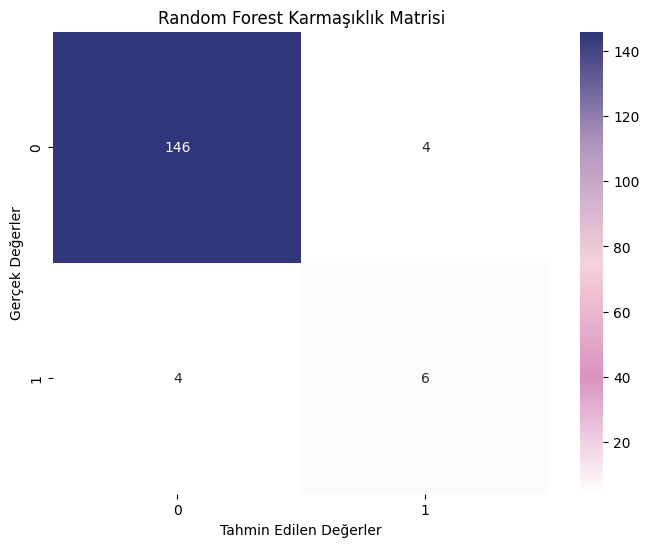


SVM Sonu√ßlarƒ±:
Doƒüruluk: 0.9625

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.83      0.50      0.62        10

    accuracy                           0.96       160
   macro avg       0.90      0.75      0.80       160
weighted avg       0.96      0.96      0.96       160



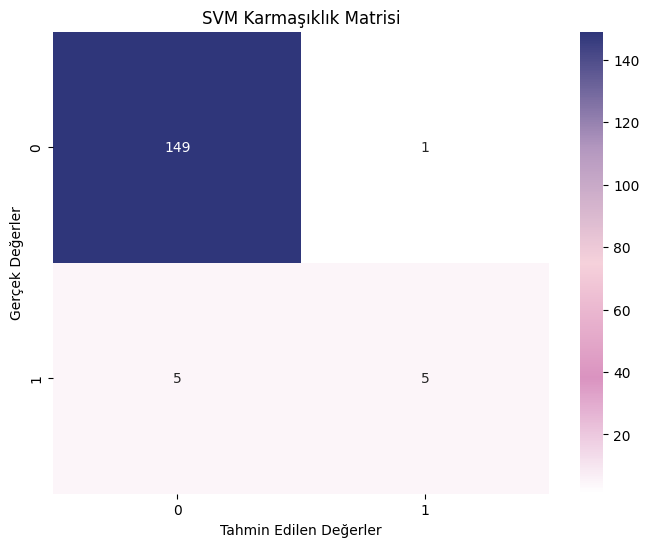


KNN Sonu√ßlarƒ±:
Doƒüruluk: 0.9500

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       150
           1       0.75      0.30      0.43        10

    accuracy                           0.95       160
   macro avg       0.85      0.65      0.70       160
weighted avg       0.94      0.95      0.94       160



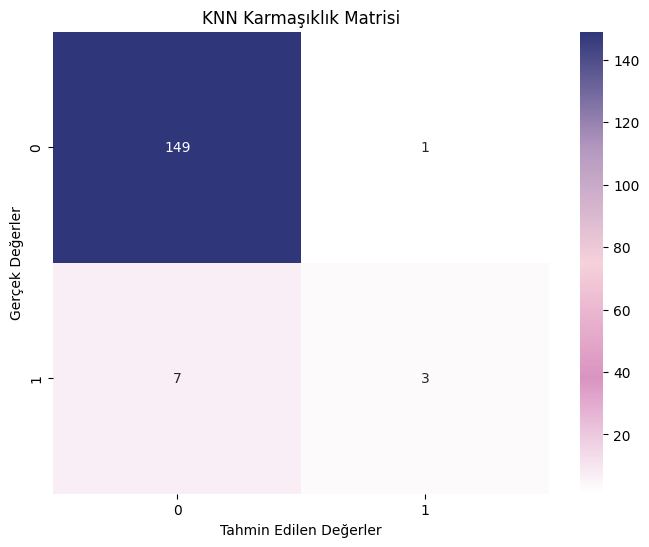


XGBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.9563

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       150
           1       0.60      0.90      0.72        10

    accuracy                           0.96       160
   macro avg       0.80      0.93      0.85       160
weighted avg       0.97      0.96      0.96       160



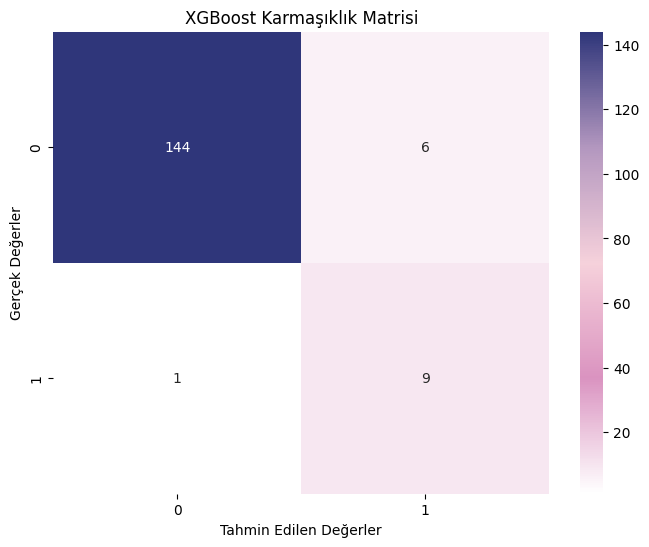


LightGBM Sonu√ßlarƒ±:
Doƒüruluk: 0.9500

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.56      0.90      0.69        10

    accuracy                           0.95       160
   macro avg       0.78      0.93      0.83       160
weighted avg       0.97      0.95      0.96       160



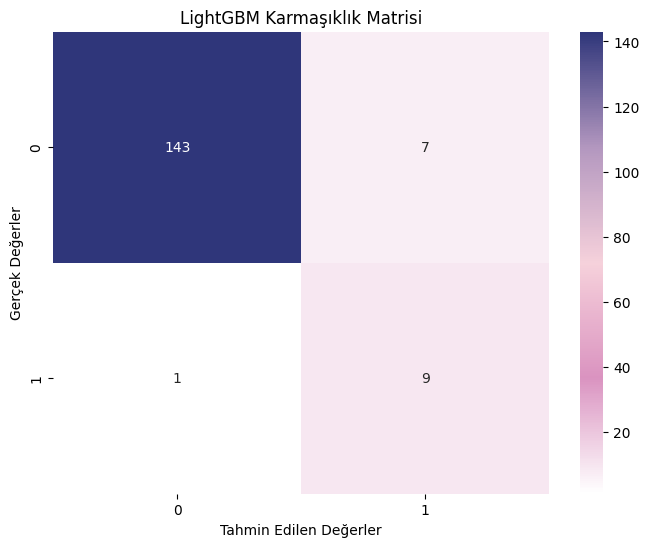


CatBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.9625

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



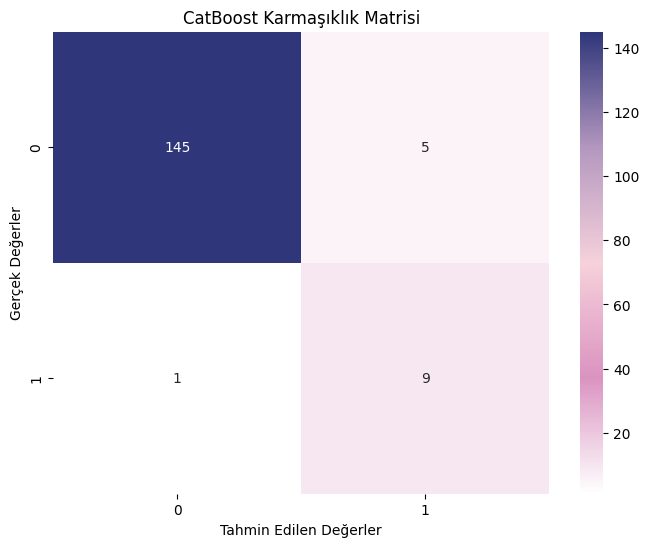

In [ ]:
# Modelleri eƒüitme ve deƒüerlendirme
results = {}
for name, model in models.items():
    # Model eƒüitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonu√ßlarƒ± kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonu√ßlarƒ±:")
    print(f"Doƒüruluk: {results[name]['accuracy']:.4f}")
    print("\nSƒ±nƒ±flandƒ±rma Raporu:")
    print(results[name]['classification_report'])


    poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
    confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)


    # Karma≈üƒ±klƒ±k matrisini g√∂rselle≈ütirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'{name} Karma≈üƒ±klƒ±k Matrisi')
    plt.ylabel('Ger√ßek Deƒüerler')
    plt.xlabel('Tahmin Edilen Deƒüerler')
    plt.show()

**Modellerin Orijinal Veri √úzerindeki Performans Deƒüerlendirmesi**


---


**Confusion Matrix**
- TP (Doƒüru Pozitif): Pozitif sƒ±nƒ±fƒ±n doƒüru tahmini.
- TN (Doƒüru Negatif): Negatif sƒ±nƒ±fƒ±n doƒüru tahmini.
- FP (Yanlƒ±≈ü Pozitif): Negatif sƒ±nƒ±fƒ±n pozitif olarak yanlƒ±≈ü tahmini.
- FN (Yanlƒ±≈ü Negatif): Pozitif sƒ±nƒ±fƒ±n negatif olarak yanlƒ±≈ü tahmini.

**Random Forest ƒ∞√ßin;**

- Bu model, Legendary olmayan 146 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 6 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 4 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 4 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.

**SVM ƒ∞√ßin;**

- Bu model, Legendary olmayan 149 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 5 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 1 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 5 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.

**KNN ƒ∞√ßin;**

- Bu model, Legendary olmayan 149 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 3 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 1 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 7 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.

**XGBoost ƒ∞√ßin;**

- Bu model, Legendary olmayan 144 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 9 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 6 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 1 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.

**LightGBM ƒ∞√ßin;**

- Bu model, Legendary olmayan 143 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 9 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 7 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 1 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.

**CatBoost ƒ∞√ßin;**

- Bu model, Legendary olmayan 145 √∂rneƒüi doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rmƒ±≈ü, Legendary olan 9 √∂rneƒüi de doƒüru tahmin etmi≈ütir. Ancak, Legendary olmayan 5 √∂rneƒüi yanlƒ±≈ülƒ±kla Legendary olarak sƒ±nƒ±flandƒ±rmƒ±≈ü ve Legendary olan 1 √∂rneƒüi de Legendary deƒüil ≈üeklinde hatalƒ± sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r.


**üéØ `Legendary` (1) Sƒ±nƒ±fƒ± Performans Analizi**

| Model        | Precision | Recall | F1-Score | Yorum |
|--------------|-----------|--------|----------|-------|
| **Random Forest** | 0.60      | 0.60   | 0.60     | 	Ne doƒüru tahminlerde y√ºksek, ne ka√ßƒ±rma oranƒ±nda d√º≈ü√ºk. Ortalama d√ºzeyde performans sergiliyor.|
| **SVM**           | 0.83      | 0.50   | 0.62     | 	Y√ºksek precision ile √ßok az yanƒ±lƒ±yor; ama d√º≈ü√ºk recall nedeniyle bir√ßok Legendary Pokemonu ka√ßƒ±rƒ±yor. ‚ÄúSe√ßici‚Äù ama ‚Äúdƒ±≈ülayƒ±cƒ±‚Äù bir model. |
| **KNN**           | 0.75      | 0.30   | 0.43     | En d√º≈ü√ºk performanslƒ± model. Legendary sƒ±nƒ±fƒ±nƒ±n √ßoƒüunu ka√ßƒ±rƒ±yor. Recall √ßok d√º≈ü√ºk. |
| **XGBoost**       | 0.60      | 0.90   | 0.72     | 	Y√ºksek recall sayesinde neredeyse t√ºm Legendary Pokemonlarƒ± buluyor, ama bir√ßok normal Pok√©monu da yanlƒ±≈ülƒ±kla Legendary sanƒ±yor. ‚ÄúHassas ama yanƒ±labilir.‚Äù |
| **LightGBM**      | 0.56      | 0.90   | 0.69     | XGBoost‚Äôa benzer ≈üekilde recall √ßok iyi, ama precision d√º≈ü√ºk. Model Legendary olmayanlara da Legendary diyebiliyor. |
| **CatBoost**      | 0.64      | 0.90   | 0.75     |Hem y√ºksek recall hem kabul edilebilir precision. Denge a√ßƒ±sƒ±ndan en ba≈üarƒ±lƒ± model. Ka√ßƒ±rmadan doƒüru tahmin yapmaya en yakƒ±n model. F1-score en y√ºksek olan model. |

---

**üìå Genel Deƒüerlendirme:**

- Eƒüer ama√ß **hi√ßbir Legendary Pokemonu ka√ßƒ±rmamaksa** (**recall √∂ncelikli**):
  ‚úÖ **XGBoost**, **LightGBM**, **CatBoost**

- Eƒüer **yanlƒ±≈ü ≈üekilde Legendary demek b√ºy√ºk bir hata** olacaksa (**precision √∂ncelikli**):
  ‚úÖ **SVM, KNN**

- Eƒüer **denge isteniyorsa** (hem doƒüru tahmin oranƒ± hem ka√ßƒ±rmama oranƒ±):
  ‚úÖ **CatBoost**

 **üß± `Legendary Olmayan (0)` Sƒ±nƒ±fƒ± Performans Analizi**

| Model        | Precision | Recall | F1-Score | Yorum |
|--------------|-----------|--------|----------|-------|
| **Random Forest** | 0.97      | 0.97   | 0.97     |Model, Legendary olmayan Pokemonlarƒ± hem y√ºksek doƒürulukla tanƒ±yor hem de nadiren Legendary ile karƒ±≈ütƒ±rƒ±yor. Dengeli bir performansa sahip. |
| **SVM**           | 0.97      | 0.99   | 0.98     |Model, Legendary olmayanlarƒ± neredeyse hatasƒ±z ≈üekilde tanƒ±yor. . |
| **KNN**           | 0.96      | 0.99   | 0.97     | Legendary olmayan sƒ±nƒ±fƒ± ba≈üarƒ±yla tanƒ±yor. Recall √ßok y√ºksek. |
| **XGBoost**       | 0.99      | 0.96   | 0.98     | Precision olduk√ßa y√ºksek: Model neredeyse hi√ß yanlƒ±≈ü ≈üekilde Legendary dememi≈ü. Recall da g√º√ßl√º, ancak birka√ß Legendary olmayanƒ± ka√ßƒ±rmƒ±≈ü. |
| **LightGBM**      | 0.99      | 0.95   | 0.97     |Model Legendary olmayanlara yanlƒ±≈ü ≈üekilde Legendary dememekte √ßok ba≈üarƒ±lƒ±. Ancak birka√ß doƒüru Legendary olmayanƒ± ka√ßƒ±rabiliyor. |
| **CatBoost**      | 0.99      | 0.97   | 0.98     | Precision ve recall dengeli. Model hem √ßok az hata yapƒ±yor hem de Legendary olmayanlarƒ± b√ºy√ºk oranda doƒüru tanƒ±yor. En g√º√ßl√º modellerden biri. |

---

üìå **Genel Deƒüerlendirme:**

- Eƒüer **Legendary olmayanlarƒ± doƒüru ≈üekilde ayƒ±rmak** √∂nemliyse (**recall √∂ncelikli**):
  ‚úÖ **CatBoost**, **XGBoost**, **SVM** √∂ne √ßƒ±kƒ±yor.   

**√á√ºnk√º; `Sƒ±nƒ±f 0`  ve `Sƒ±nƒ±f 1` i√ßin recall ≈üu anlamlara gelir:**

- `Sƒ±nƒ±f 1:`
Ger√ßekten Legendary olan pokemonlarƒ± (sƒ±nƒ±f 1 ) doƒüru ≈üekilde Legendary olarak tahmin edebilmek.
- `Sƒ±nƒ±f 0:`
Ger√ßekten Legendary olmayan pokemonlarƒ± (sƒ±nƒ±f 0) doƒüru ≈üekilde Legendary deƒüil diye tahmin edebilmek.
  



 ## **3.4.   En Ba≈üarƒ±lƒ± Modelin Belirlenmesi**




### 3.4.1.  T√ºm Modellerin Doƒüruluk Skorlarƒ±nƒ± Kar≈üƒ±la≈ütƒ±rma

**Doƒüruluk (Accuracy):**
T√ºm modeller genel doƒüruluk a√ßƒ±sƒ±ndan olduk√ßa y√ºksek deƒüerlere (yakla≈üƒ±k %95 ve √ºzeri) ula≈ümƒ±≈ü. Ancak doƒüruluk, azƒ±nlƒ±k sƒ±nƒ±fƒ±n (1) √ßok az olduƒüu dengesiz veri setlerinde yanƒ±ltƒ±cƒ± olabilir; √ß√ºnk√º √ßoƒüunluk sƒ±nƒ±fƒ±nƒ± iyi tahmin etmek yeterli doƒüruluk getirir. Bu nedenle diƒüer metrikler de denendi..

### 3.4.2. En ƒ∞yi Modeli Bulma

In [ ]:
# En iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"\nEn iyi model: {best_model_name}")


En iyi model: SVM


SVM, elde edilen doƒüruluk skoruna g√∂re en ba≈üarƒ±lƒ± model olarak belirlenmi≈ütir.

 ## **3.5.   En Ba≈üarƒ±lƒ± Modelin Belirlenmesi Hiperparametre Optimizasyonu (GridSearchCV)**

In [ ]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto']
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 150],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1, 0.2],
        'subsample': [0.7, 0.9]
    },
    'LightGBM': {
        'n_estimators': [100, 150],
        'max_depth': [5, 10, -1],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 31, 50]
    },
    'CatBoost': {
        'iterations': [100, 150],
        'depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1],
        'l2_leaf_reg': [3, 5, 7]
    }
}


In [ ]:
# GridSearchCV i√ßin model ve parametre grid'ini se√ßme
model = models[best_model_name]
param_grid = param_grids[best_model_name]

In [ ]:
# GridSearchCV ile hiper parametre optimizasyonu
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
best_models = {}

for name, model in models.items():
    print(f"\n{name} i√ßin GridSearch ba≈ülatƒ±lƒ±yor...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

# En iyi 2 modeli se√ß
top_models = sorted(best_models.items(), key=lambda x: x[1]['best_score'], reverse=True)[:2]

print("\n En iyi 2 model:")
for i, (name, result) in enumerate(top_models, 1):
    print(f"\n{i}. Model: {name}")
    print(f"   - En iyi CV skoru: {result['best_score']:.4f}")
    print(f"   - En iyi parametreler: {result['best_params']}")



Random Forest i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

SVM i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

KNN i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

XGBoost i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

LightGBM i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

CatBoost i√ßin GridSearch ba≈ülatƒ±lƒ±yor...

 En iyi 2 model:

1. Model: XGBoost
   - En iyi CV skoru: 0.9562
   - En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

2. Model: CatBoost
   - En iyi CV skoru: 0.9515
   - En iyi parametreler: {'depth': 6, 'iterations': 150, 'l2_leaf_reg': 5, 'learning_rate': 0.1}



 Optimize Edilmi≈ü En ƒ∞yi 2 Modelin Karma≈üƒ±klƒ±k Matrisleri:


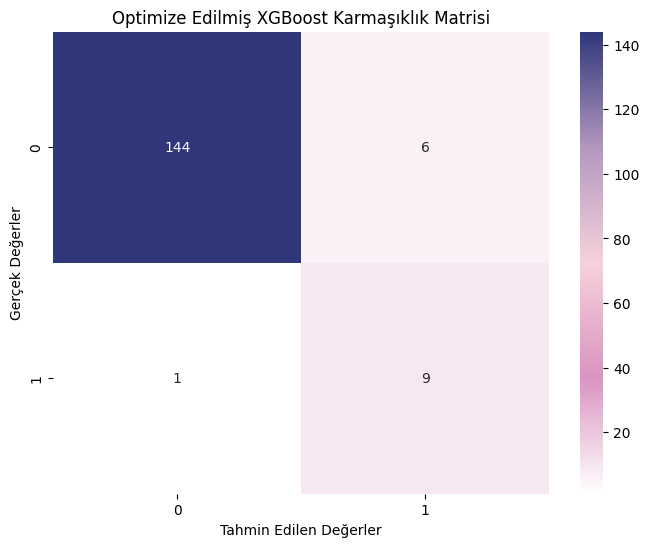

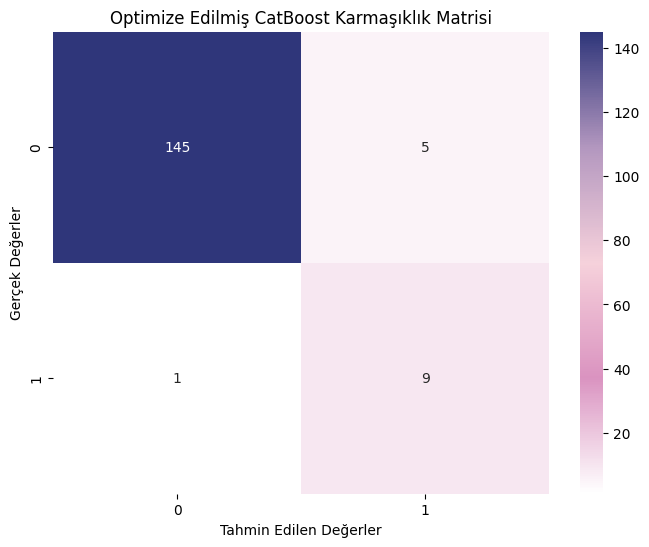

In [ ]:
poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)

print("\n Optimize Edilmi≈ü En ƒ∞yi 2 Modelin Karma≈üƒ±klƒ±k Matrisleri:")

for i, (best_model_name, result) in enumerate(top_models, 1):
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'Optimize Edilmi≈ü {best_model_name} Karma≈üƒ±klƒ±k Matrisi')
    plt.ylabel('Ger√ßek Deƒüerler')
    plt.xlabel('Tahmin Edilen Deƒüerler')
    plt.show()



**Model Optimizasyonu Sonu√ßlarƒ± ‚Äì Pokemon Sƒ±nƒ±flandƒ±rma Problemi**


---



Bu √ßalƒ±≈ümada modellemede kullandƒ±ƒüƒ±mƒ±z 6 sƒ±nƒ±flandƒ±rma algoritmasƒ± √ºzerinde `GridSearchCV` ile hiperparametre optimizasyonu uygulanmƒ±≈ütƒ±r. Ancak optimizasyon sonrasƒ± elde edilen sonu√ßlar, bazƒ± modellerde performans kaybƒ±na yol a√ßmƒ±≈ütƒ±r.

---

**üìä Model Performans Kar≈üƒ±la≈ütƒ±rmasƒ± (Accuracy)**

| Model      | Optimizasyon √ñncesi | Optimizasyon Sonrasƒ± | ƒ∞yile≈üme (Fark) |
|------------|----------------------|-----------------------|-----------------|
| **CatBoost** | 0.9625               | 0.9515                | **-0.0110**     |
| **XGBoost**  | 0.9563               | 0.9562                | **-0.0001**     |

---

**üìå Yorumlar**

Model Optimizasyonunda en ba≈üarƒ±lƒ± sonu√ß alƒ±nan 2 algoritma hakkƒ±nda:

- **CatBoost** modeli optimizasyon √∂ncesinde en y√ºksek doƒüruluk oranƒ±nƒ± (**%96.25**) vermi≈ütir.
- Grid Search sonrasƒ± elde edilen parametre kombinasyonlarƒ±, √∂zellikle CatBoost i√ßin **hafif bir performans d√º≈ü√º≈ü√º** yaratmƒ±≈ütƒ±r.
- **XGBoost** modeli ise neredeyse sabit kalmƒ±≈ü ve varsayƒ±lan ayarlarƒ±nƒ±n zaten olduk√ßa ba≈üarƒ±lƒ± olduƒüu g√∂zlemlenmi≈ütir.
- Bu nedenle, **model se√ßiminde optimizasyon √∂ncesi sonu√ßlar dikkate alƒ±nmƒ±≈ütƒ±r.**

---

**‚úÖ Sonu√ß**

Modelleme s√ºrecinde, hiperparametre optimizasyonu her zaman performansƒ± artƒ±rmaz. √ñzellikle sƒ±nƒ±rlƒ± veri setlerinde varsayƒ±lan parametreler √ßok g√º√ßl√º sonu√ßlar verebilir. Bu √ßalƒ±≈üma, **√∂nceden belirlenen parametrelerle elde edilen performansƒ±n korunmasƒ±nƒ±n daha doƒüru bir tercih** olabileceƒüini g√∂stermektedir.


# **4. Sonu√ßlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± ve Raporlama**

 ## **4.1.  Modellerin Skorlarƒ±nƒ±n √áubuk Grafikle G√∂rselle≈ütirilmesi**

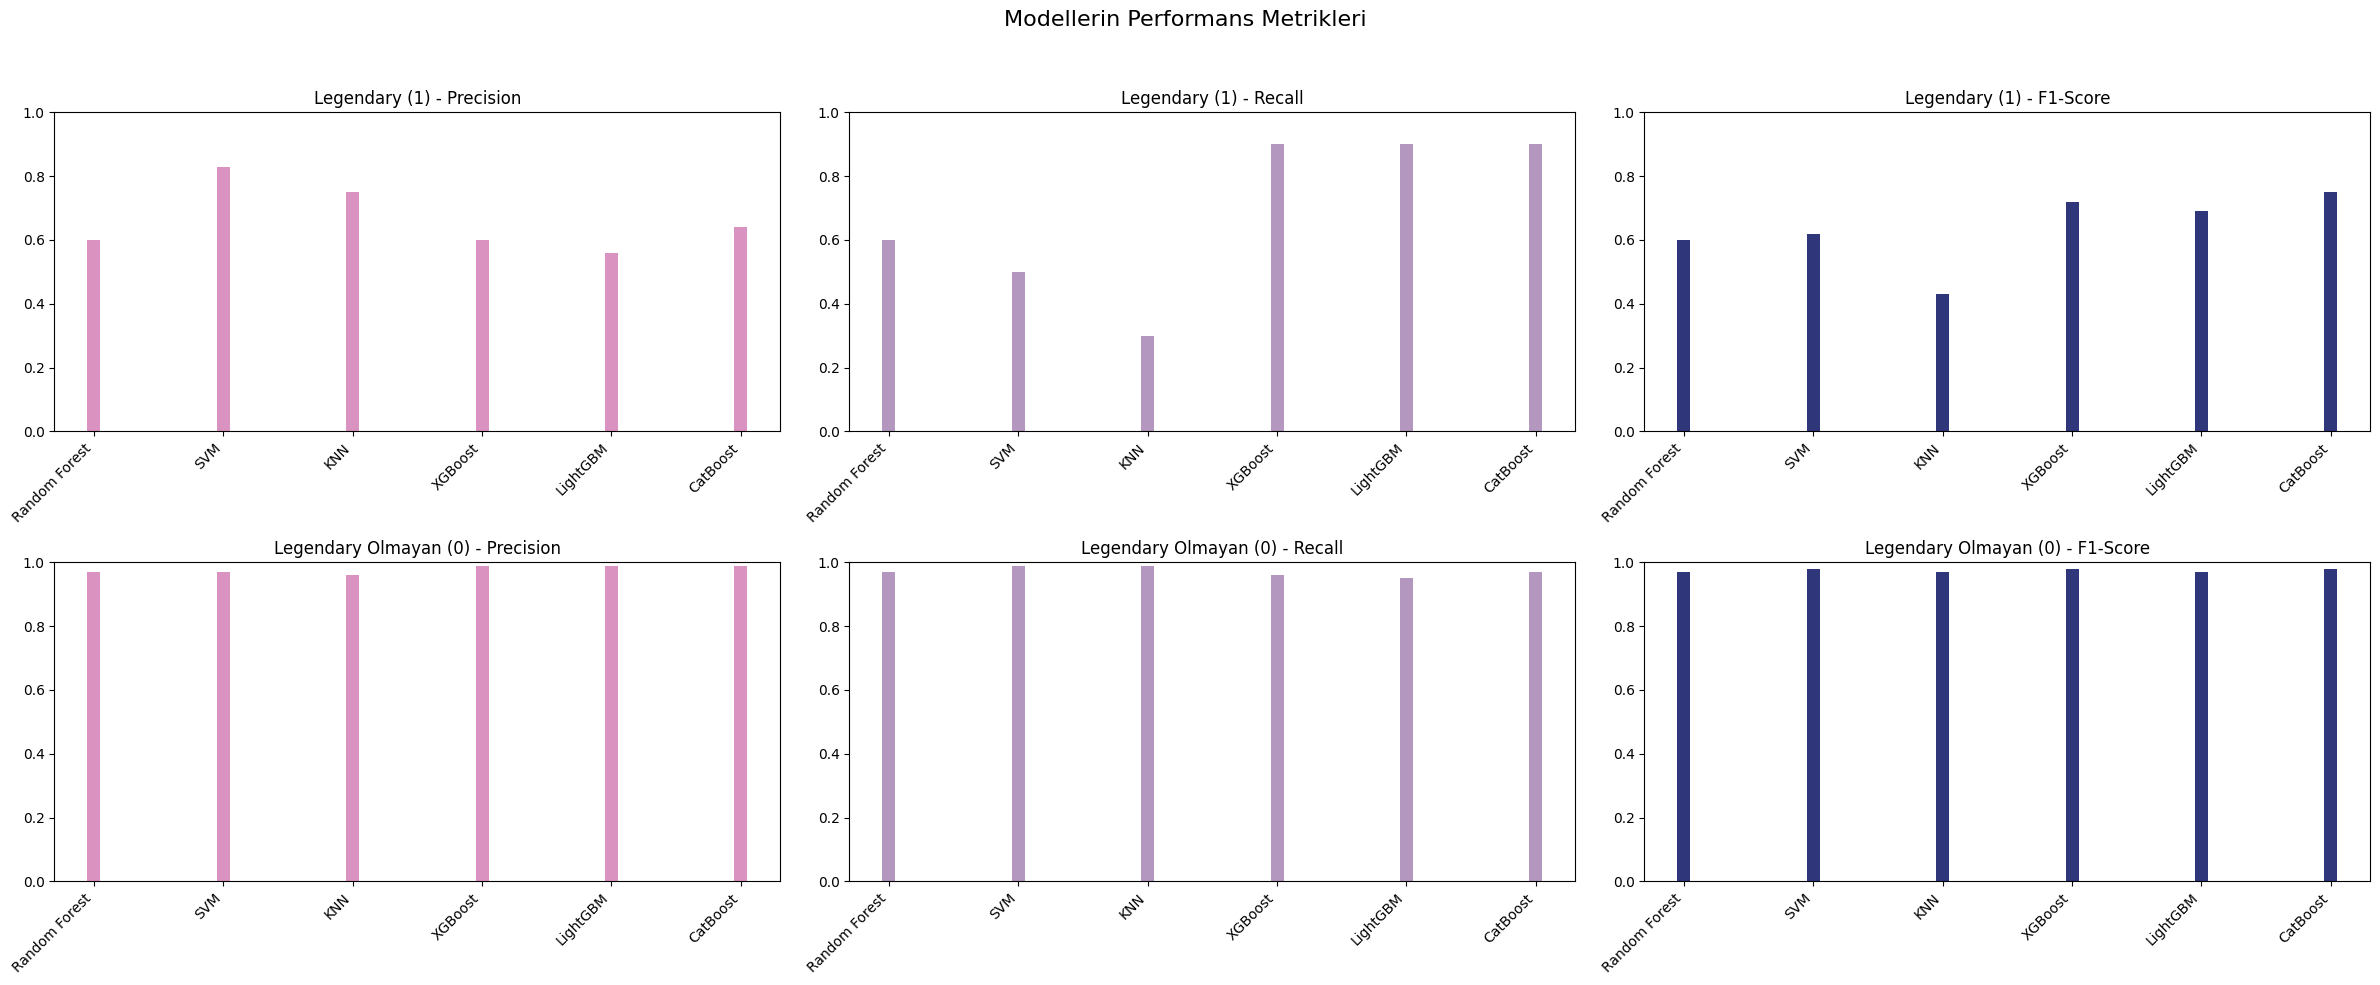

In [ ]:
# Modellerin isimleri
models = ['Random Forest', 'SVM', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost']

# Legendary (1) sƒ±nƒ±fƒ± i√ßin skorlar
precision_1 = [0.60, 0.83, 0.75, 0.60, 0.56, 0.64]
recall_1    = [0.60, 0.50, 0.30, 0.90, 0.90, 0.90]
f1_1        = [0.60, 0.62, 0.43, 0.72, 0.69, 0.75]

# Legendary olmayan (0) sƒ±nƒ±fƒ± i√ßin skorlar
precision_0 = [0.97, 0.97, 0.96, 0.99, 0.99, 0.99]
recall_0    = [0.97, 0.99, 0.99, 0.96, 0.95, 0.97]
f1_0        = [0.97, 0.98, 0.97, 0.98, 0.97, 0.98]

# √áubuk geni≈üliƒüi ve pozisyonlarƒ±
bar_width = 0.1
indices = np.arange(len(models))

fig, axs = plt.subplots(2, 3, figsize=(24, 10))
fig.suptitle('Modellerin Performans Metrikleri', fontsize=16)

# Legendary (1) sƒ±nƒ±fƒ± i√ßin Precision
axs[0, 0].bar(indices, precision_1, width=bar_width, color='#da93c0')
axs[0, 0].set_title('Legendary (1) - Precision')
axs[0, 0].set_xticks(indices)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
axs[0, 0].set_ylim(0,1)

# Legendary (1) sƒ±nƒ±fƒ± i√ßin Recall
axs[0, 1].bar(indices, recall_1, width=bar_width, color='#b397bf')
axs[0, 1].set_title('Legendary (1) - Recall')
axs[0, 1].set_xticks(indices)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
axs[0, 1].set_ylim(0,1)

# Legendary (1) sƒ±nƒ±fƒ± i√ßin F1-Score
axs[0, 2].bar(indices, f1_1, width=bar_width, color='#2f367a')
axs[0, 2].set_title('Legendary (1) - F1-Score')
axs[0, 2].set_xticks(indices)
axs[0, 2].set_xticklabels(models, rotation=45, ha='right')
axs[0, 2].set_ylim(0,1)

# Legendary olmayan (0) sƒ±nƒ±fƒ± i√ßin Precision
axs[1, 0].bar(indices, precision_0, width=bar_width, color='#da93c0')
axs[1, 0].set_title('Legendary Olmayan (0) - Precision')
axs[1, 0].set_xticks(indices)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
axs[1, 0].set_ylim(0,1)

# Legendary olmayan (0) sƒ±nƒ±fƒ± i√ßin Recall
axs[1, 1].bar(indices, recall_0, width=bar_width, color='#b397bf')
axs[1, 1].set_title('Legendary Olmayan (0) - Recall')
axs[1, 1].set_xticks(indices)
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')
axs[1, 1].set_ylim(0,1)

# Legendary olmayan (0) sƒ±nƒ±fƒ± i√ßin F1-Score
axs[1, 2].bar(indices, f1_0, width=bar_width, color='#2f367a')
axs[1, 2].set_title('Legendary Olmayan (0) - F1-Score')
axs[1, 2].set_xticks(indices)
axs[1, 2].set_xticklabels(models, rotation=45, ha='right')
axs[1, 2].set_ylim(0,1)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Legendary 1 ve 0 sƒ±nƒ±flarƒ± i√ßin t√ºm modellerin recall, precision ve F1-Score deƒüerleri √ßubuk grafikle √ßizdirildi..

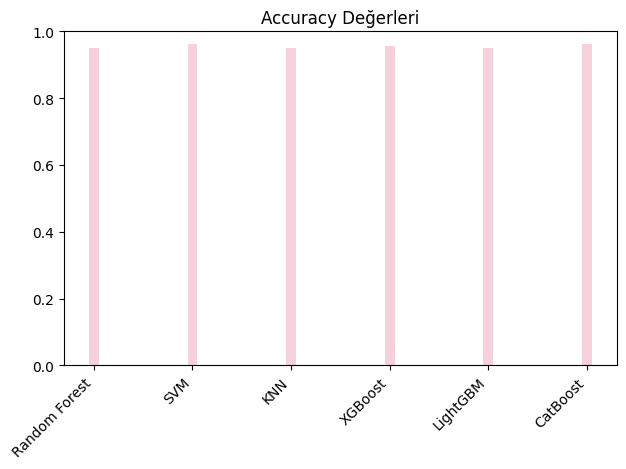

In [ ]:
# Modellerin isimleri
models = ['Random Forest', 'SVM', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost']

accuracy = [0.9500, 0.9625, 0.9500, 0.9563, 0.9500, 0.9625]

# Accuracy Skorlarƒ±
plt.bar(indices, accuracy, width=bar_width, color='#f6d1db')
plt.title('Accuracy Deƒüerleri')
plt.xticks(indices, models, rotation=45, ha='right')
plt.ylim(0,1)


plt.tight_layout()
plt.show()

T√ºm modellerin accuracy deƒüerleri √ßubuk grafikle √ßizdirildi..

 ## **4.2. Model Performansƒ± Yorumlama**

**Legendary (1) Sƒ±nƒ±fƒ± ƒ∞√ßin En ƒ∞yi Performans G√∂steren Modeller**

---

**En Y√ºksek Recall (0.90) ile √ñne √áƒ±kanlar:**
- **CatBoost**, **XGBoost**, **LightGBM**  
  ‚úÖ Ger√ßek Legendary Pokemonlarƒ±n %90‚Äôƒ±nƒ± doƒüru ≈üekilde tespit ediyorlar.  
  ‚úÖ Bu modeller, **Gradient Boosting** algoritmalarƒ±dƒ±r.  
  ‚úÖ Karma≈üƒ±k √∂r√ºnt√ºleri √∂ƒürenmede ve **non-lineer** ili≈ükileri yakalamada ba≈üarƒ±lƒ±dƒ±r.

---

**En Y√ºksek Precision (0.83):**
- **SVM (Support Vector Machine)**  
  ‚úÖ Yanlƒ±≈ü pozitif oranƒ± en d√º≈ü√ºk modeldir.  
  ‚ùå Ancak recall deƒüeri d√º≈ü√ºk (0.50) ‚Üí bir√ßok ger√ßek Legendary Pokemonu ka√ßƒ±rƒ±yor.

---

**D√º≈ü√ºk Precision √ñrneƒüi:**
- **Random Forest**
  - Precision: **0.60**
  - Model, √ßok fazla **Pokemonu yanlƒ±≈ülƒ±kla "Legendary"** olarak sƒ±nƒ±flandƒ±rƒ±yor.

---

**Kritik Bulgular**

---

**Trade-off Problemi:**
- **SVM:**  
  ‚úÖ Y√ºksek precision (**0.83**)  
  ‚ùå D√º≈ü√ºk recall (**0.50**)  
  > ‚Üí **√áok muhafazakar** bir model; yanlƒ±≈ü alarm vermemeye odaklanƒ±yor, ancak √ßok fazla ger√ßek Legendary‚Äôyi ka√ßƒ±rƒ±yor.

---

**En Dengeli Performans:**
- **CatBoost:**

  Precision: **0.64**

  Recall: **0.90**

  F1-Score: **Yakla≈üƒ±k 0.75**
  > Hem doƒüru tahmin oranƒ± hem de ka√ßƒ±rmama oranƒ± a√ßƒ±sƒ±ndan dengeli bir modeldir.

---

**Legendary Olmayan (0) Sƒ±nƒ±fƒ± Performansƒ±**

---

- T√ºm modellerde m√ºkemmel sonu√ßlar:  
  - Recall: **0.97 - 1.00**
- **Neden?**  
  ‚Üí Veri setinde Legendary olmayan √∂rneklerin √ßok daha fazla olmasƒ±, bu modellerin √ßoƒüunluk sƒ±nƒ±fƒ± daha kolay √∂ƒürenmesine neden olur.


 ## **4.3.  √ñzellik √ñnem Skorlarƒ±**

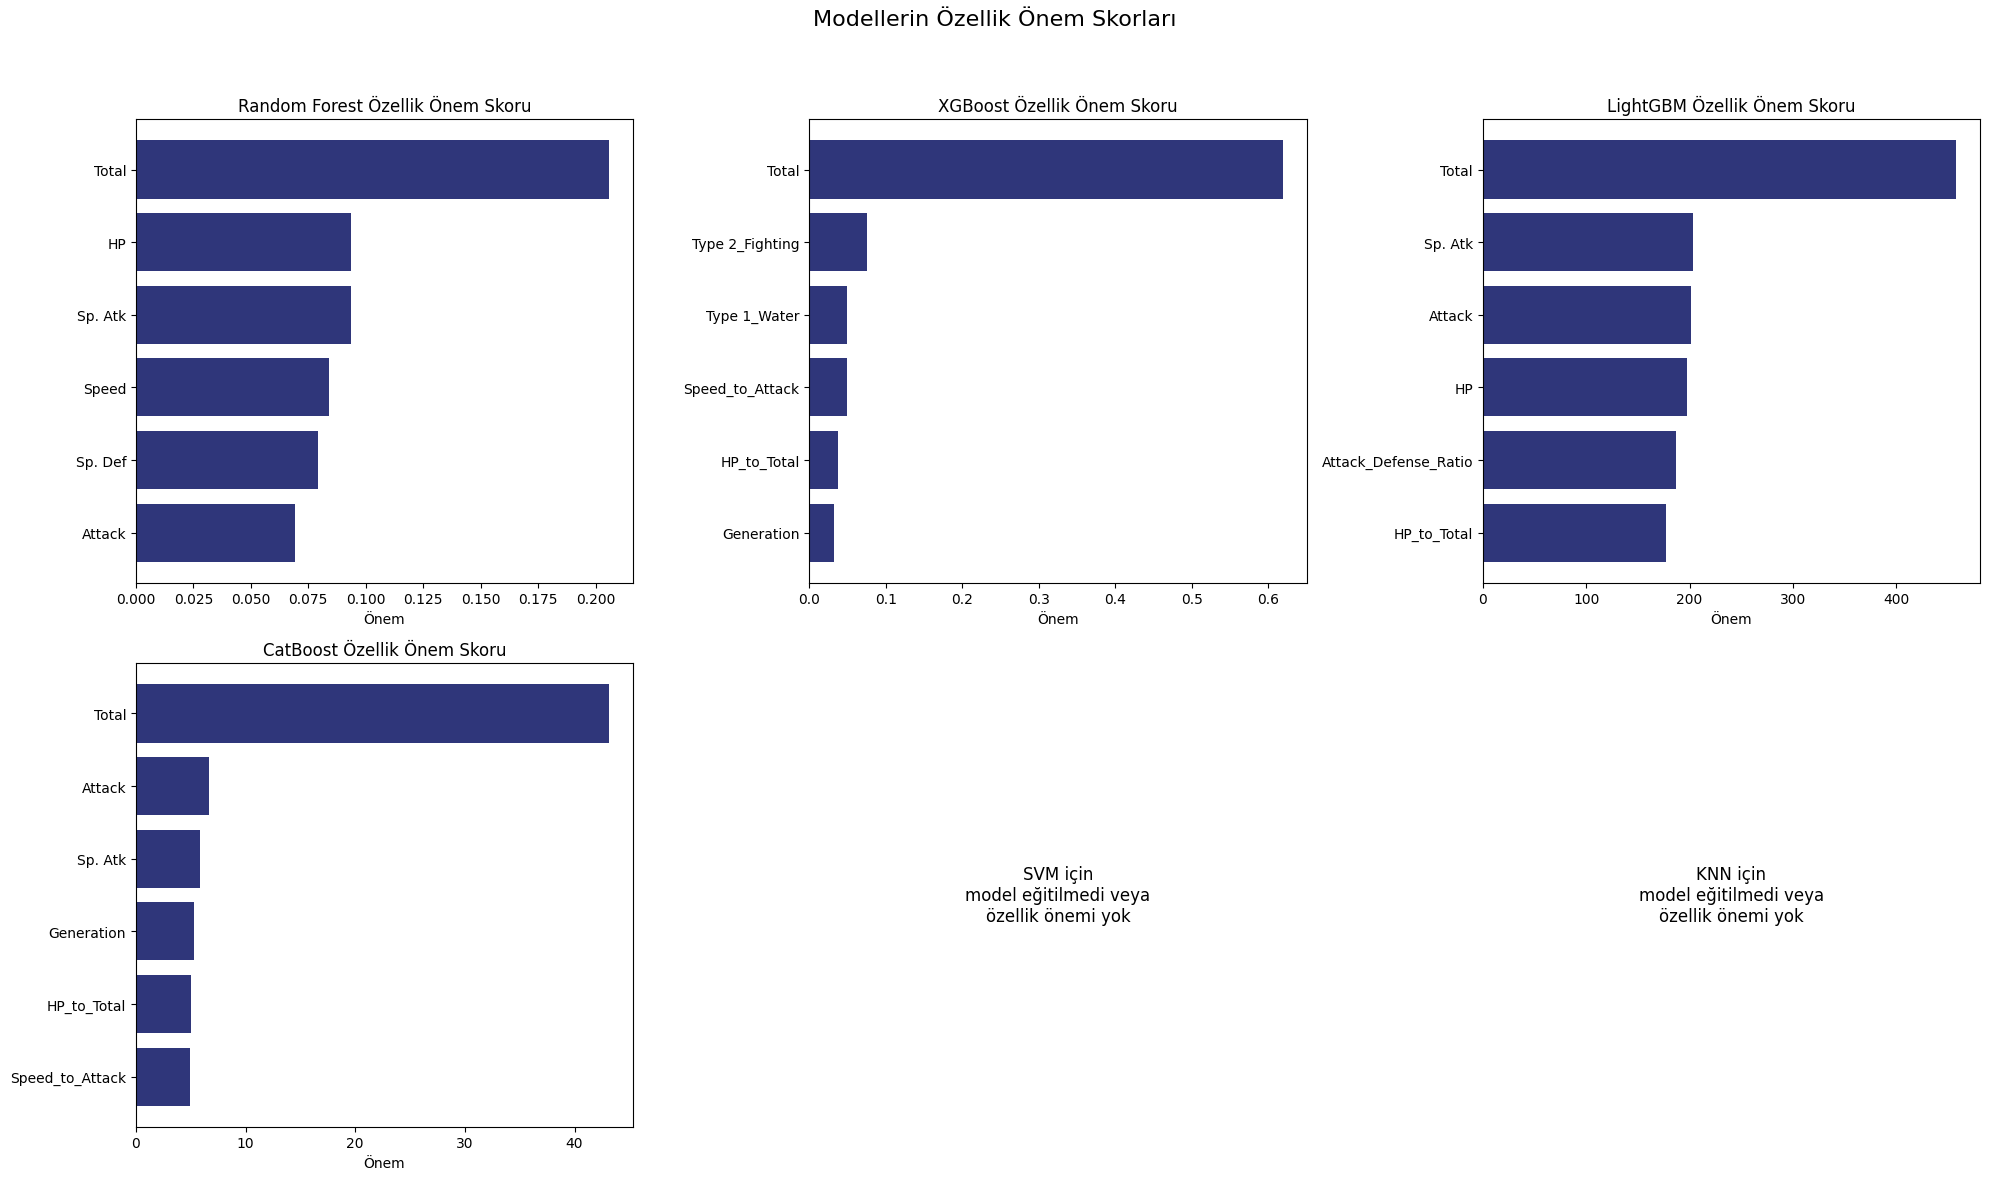

In [ ]:
# Modeller ve isimleri
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'SVM': None,  # √ñzellik √∂nemi yok
    'KNN': None   # √ñzellik √∂nemi yok
}

fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Modellerin √ñzellik √ñnem Skorlarƒ±', fontsize=16)
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    ax = axs[i]
    if model is not None:
        model.fit(X_train, y_train)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)  # En iyi 6 √∂zellik
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} √ñzellik √ñnem Skoru")
            ax.set_xlabel("√ñnem")
        else:
            ax.text(0.5, 0.5, f"{name} i√ßin\n√∂zellik √∂nemi\nbulunmamaktadƒ±r",
                    ha='center', va='center', fontsize=12)
            ax.set_axis_off()
    else:
        ax.text(0.5, 0.5, f"{name} i√ßin\nmodel eƒüitilmedi veya\n√∂zellik √∂nemi yok",
                ha='center', va='center', fontsize=12)
        ax.set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**En √ñnemli √ñzellikler**





- Total √∂zelliƒüi t√ºm modellerde (Random Forest, XGBoost, LightGBM, CatBoost) a√ßƒ±k ara en √∂nemli √∂zellik olarak √∂ne √ßƒ±kƒ±yor. Bu, Pokemonun toplam istatistiklerinin Legendary olup olmadƒ±ƒüƒ±nƒ± belirlemede kritik rol oynadƒ±ƒüƒ±nƒ± g√∂steriyor.


---



**Model Bazƒ±nda Farklƒ±lƒ±klar**

- Random Forest: HP, Sp_Atk, Speed, Sp_Def ve Attack gibi temel istatistiklere odaklanƒ±yor ve bu √∂zelliklere nispeten e≈üit √∂nem veriyor.
- XGBoost: Type_2_Fighting, Type_1_Water gibi Pokemon t√ºrlerine ve Speed_to_Attack oranƒ±na √∂nem veriyor. Bu model t√ºr bilgisini daha fazla kullanƒ±yor ve g√∂rece daha az √∂zellik kullanƒ±yor.
- LightGBM: Sp_Atk, Attack, HP gibi saldƒ±rƒ± odaklƒ± istatistiklere ve Attack_Defense_Ratio gibi oransal √∂zelliklere aƒüƒ±rlƒ±k veriyor.
- CatBoost: Attack, Sp_Atk, Generation gibi √∂zelliklere odaklanƒ±yor.
---

**Modelin Olmadƒ±ƒüƒ± Durumlar**

SVM ve KNN i√ßin "model eƒüitilmedi veya √∂zellik √∂nemi yok" notu d√º≈ü√ºlm√º≈ü. Bu modeller doƒürudan √∂zellik √∂nem skorlarƒ± saƒülamƒ±yor. √á√ºnk√º Random Forest, XGBoost, LightGBM, CatBoost gibi aƒüa√ß tabanlƒ± modeller kendi i√ßinde `feature_importances_` √∂zelliƒüine sahiptir, yani her √∂zelliƒüin modele katkƒ±sƒ±nƒ± sayƒ±sal olarak √ßƒ±karabilir. Ancak KNN ve SVM gibi modellerde bu doƒürudan yapƒ±lamadƒ±ƒüƒ± i√ßin None atandƒ± ve grafiklerde "√∂zellik √∂nemi yok" diye g√∂steriliyor..

---

**Genel √áƒ±karƒ±m**

Legendary Pokemonlarƒ± ayƒ±rt etmede en kritik fakt√∂r toplam istatistik deƒüeri. Farklƒ± algoritmalar farklƒ± √∂zelliklere odaklanƒ±yor, bu da ensemble yakla≈üƒ±mlarƒ±n neden etkili olabileceƒüini a√ßƒ±klƒ±yor.

# **5. Bonus**

 ## **5.1. SMOTE veya Benzeri Y√∂ntemlerle Sƒ±nƒ±f Dengesizliƒüini D√ºzeltme ve Etkiyi G√∂zlemleme**

In [ ]:
# Hedef deƒüi≈ükenin i√ßeriƒüi
print("Legendary deƒüerleri:", df["Legendary"].unique())

# Eƒüitim/test verilerinde hedef deƒüi≈ükenin daƒüƒ±lƒ±mƒ±
print("y_train sƒ±nƒ±f daƒüƒ±lƒ±mƒ±")
print(y_train.value_counts())

print("y_test sƒ±nƒ±f daƒüƒ±lƒ±mƒ±")
print(y_test.value_counts())


Legendary deƒüerleri: [False  True]
y_train sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
legendary_label
0    585
1     55
Name: count, dtype: int64
y_test sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
legendary_label
0    150
1     10
Name: count, dtype: int64


G√∂r√ºld√ºƒü√º √ºzerede veri setimiz olduk√ßa dengesiz bu nedenle smote y√∂ntemini uygulayacaƒüƒ±z..

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Eƒüitim ve test verisini ayƒ±rƒ±rken stratify kullanma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Eƒüitim verisi - orijinal sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:", Counter(y_train))

# SMOTE ile √ßoƒüaltma oranƒ±nƒ± %90 olarak ayarlayalƒ±m
smote = SMOTE(random_state=42, sampling_strategy=0.9)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE sonrasƒ± eƒüitim verisi - sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:", Counter(y_train_resampled))



Eƒüitim verisi - orijinal sƒ±nƒ±f daƒüƒ±lƒ±mƒ±: Counter({0: 514, 1: 46})
SMOTE sonrasƒ± eƒüitim verisi - sƒ±nƒ±f daƒüƒ±lƒ±mƒ±: Counter({0: 514, 1: 462})


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}


Random Forest Sonu√ßlarƒ±:
Doƒüruluk: 0.9417

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.59      0.84      0.70        19

    accuracy                           0.94       240
   macro avg       0.79      0.90      0.83       240
weighted avg       0.95      0.94      0.95       240



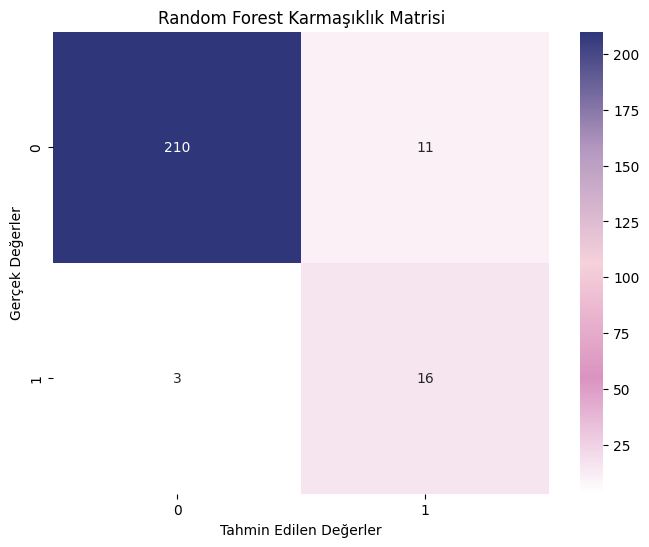


SVM Sonu√ßlarƒ±:
Doƒüruluk: 0.9333

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       221
           1       0.62      0.42      0.50        19

    accuracy                           0.93       240
   macro avg       0.78      0.70      0.73       240
weighted avg       0.92      0.93      0.93       240



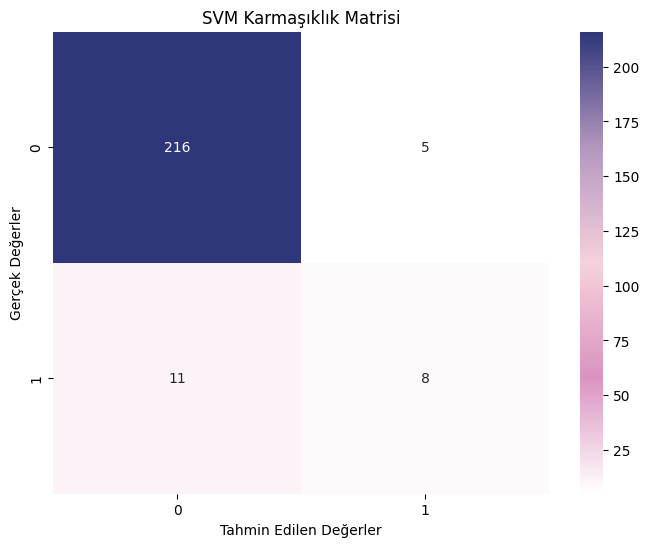


KNN Sonu√ßlarƒ±:
Doƒüruluk: 0.9292

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       221
           1       0.56      0.47      0.51        19

    accuracy                           0.93       240
   macro avg       0.76      0.72      0.74       240
weighted avg       0.92      0.93      0.93       240



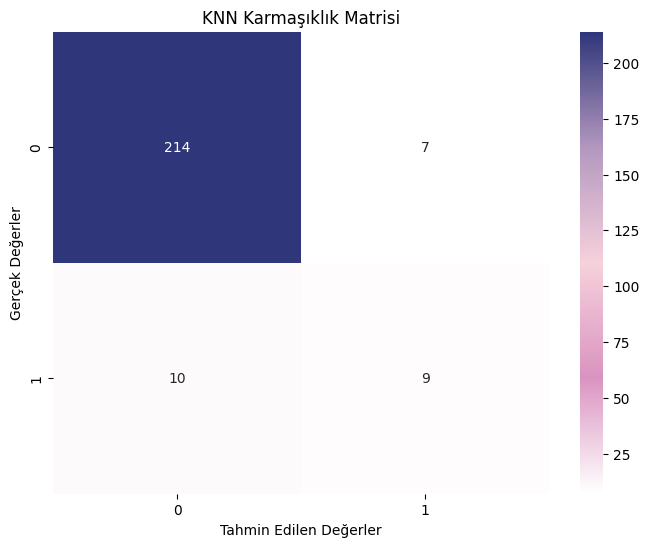


XGBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.9458

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



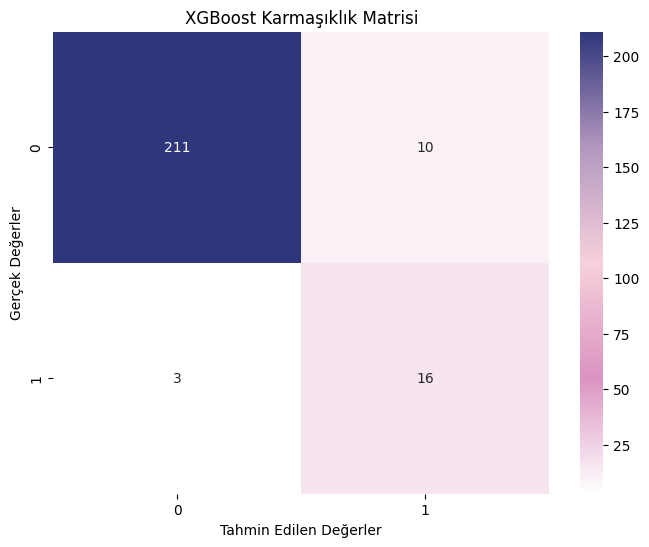


LightGBM Sonu√ßlarƒ±:
Doƒüruluk: 0.9542

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       221
           1       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



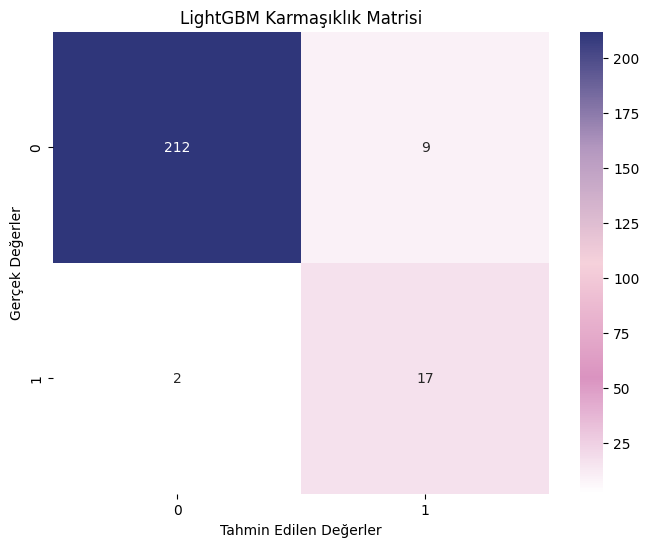


CatBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.9375

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.57      0.84      0.68        19

    accuracy                           0.94       240
   macro avg       0.78      0.89      0.82       240
weighted avg       0.95      0.94      0.94       240



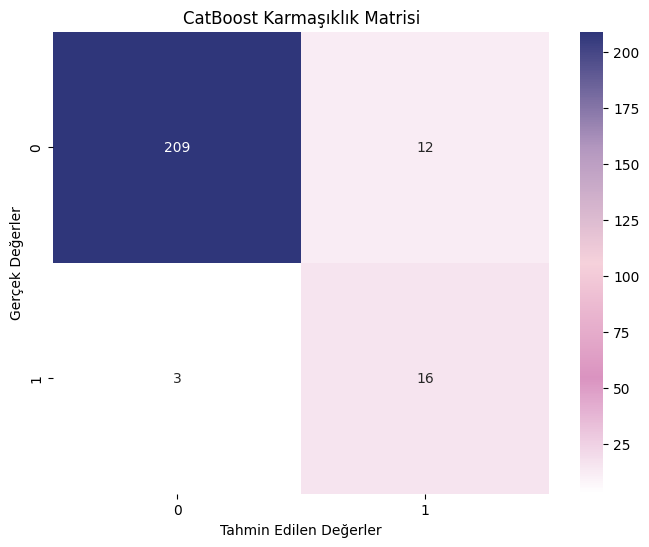

In [ ]:
# Modelleri eƒüitme ve deƒüerlendirme
results = {}
for name, model in models.items():
    # Model eƒüitimi (SMOTE sonrasƒ± veriyi kullan)
    model.fit(X_train_resampled, y_train_resampled)

    # Tahminler (test verisi √ºzerinde)
    y_pred = model.predict(X_test)

    # Sonu√ßlarƒ± kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonu√ßlarƒ±:")
    print(f"Doƒüruluk: {results[name]['accuracy']:.4f}")
    print("\nSƒ±nƒ±flandƒ±rma Raporu:")
    print(results[name]['classification_report'])

    poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
    confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)

    # Karma≈üƒ±klƒ±k matrisini g√∂rselle≈ütirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'{name} Karma≈üƒ±klƒ±k Matrisi')
    plt.ylabel('Ger√ßek Deƒüerler')
    plt.xlabel('Tahmin Edilen Deƒüerler')
    plt.show()


**üìä SMOTE Uygulamasƒ± √ñncesi vs Sonrasƒ± Performans Kar≈üƒ±la≈ütƒ±rmasƒ±**


---


Dengesiz veri setlerinde, √∂zellikle azƒ±nlƒ±k sƒ±nƒ±fƒ±n (Legendary - Sƒ±nƒ±f 1) √ßok az g√∂zlem i√ßerdiƒüi durumlarda modeller, √ßoƒüunluk sƒ±nƒ±fƒ± (Non-Legendary - Sƒ±nƒ±f 0) √∂ƒürenmeye meyillidir. Bu da genellikle y√ºksek doƒüruluk (accuracy) skorlarƒ± √ºretse de azƒ±nlƒ±k sƒ±nƒ±f i√ßin d√º≈ü√ºk recall ve f1 score deƒüerlerine neden olur.

SMOTE (Synthetic Minority Over-sampling Technique) uygulanarak azƒ±nlƒ±k sƒ±nƒ±f √∂rnekleri sentetik olarak artƒ±rƒ±lmƒ±≈ü ve sƒ±nƒ±f daƒüƒ±lƒ±mƒ± dengelenmi≈ütir. Bu sayede modellerin azƒ±nlƒ±k sƒ±nƒ±fa dair √∂ƒürenme kapasitesi artmƒ±≈ü, sonu√ß olarak sƒ±nƒ±f 1 i√ßin recall ve f1 score deƒüerleri belirgin ≈üekilde iyile≈ümi≈ütir.


---



**üîç SMOTE Uygulamasƒ± √ñncesi ve Sonrasƒ± Performans Tablosu**


---



| Model        | Accuracy (√ñnce) | Accuracy (Sonra) | Sƒ±nƒ±f 1 Recall (√ñnce) | Sƒ±nƒ±f 1 Recall (Sonra) |
|--------------|------------------|-------------------|------------------------|-------------------------|
| Random Forest | 0.95             | 0.94              | 0.60                   | 0.84                    |
| SVM           | 0.96             | 0.93              | 0.50                   | 0.42                    |
| KNN           | 0.95            | 0.93              | 0.30                   | 0.47                    |
| XGBoost       | 0.96             | 0.95              | 0.90                   | 0.84                    |
| LightGBM      | 0.95             | 0.95              | 0.90                   | 0.89                    |
| CatBoost      | 0.96             | 0.94              | 0.90                   | 0.84                    |

---

 **‚úÖ G√∂zlemler**

---

SMOTE uygulamasƒ±, √∂zellikle Random Forest ve KNN gibi modellerde sƒ±nƒ±f 1 i√ßin recall artƒ±≈üƒ± saƒülayarak azƒ±nlƒ±k sƒ±nƒ±fƒ±n daha iyi √∂ƒürenilmesine katkƒ± saƒülamƒ±≈ütƒ±r.

XGBoost, LightGBM ve CatBoost modelleri, SMOTE √∂ncesinde de y√ºksek performans g√∂sterdiƒüinden, SMOTE sonrasƒ± deƒüi≈üim g√∂receli olarak daha azdƒ±r.

SVM modeli, SMOTE sonrasƒ±nda sƒ±nƒ±f 1 performansƒ±nda diƒüerlerine oranla (accuracy 96'dan 93'e) d√º≈ü√º≈ü g√∂stermi≈ü, bu da her modelin SMOTE‚Äôtan aynƒ± ≈üekilde faydalanmadƒ±ƒüƒ±nƒ± g√∂stermektedir.

Genel olarak doƒüruluk (accuracy) skorlarƒ±nda √ßok b√ºy√ºk kayƒ±plar ya≈üanmazken, azƒ±nlƒ±k sƒ±nƒ±f performansƒ±nda belirgin artƒ±≈ülar ya da k√º√ß√ºk azalmalar g√∂zlemlenmi≈ütir.
